In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\User\Desktop\ÌîÑÎ°úÏ†ùÌä∏\Í∞úÏù∏\instacart_feedback\ÎØºÏßÄ\translated_reviews.csv")
df.head(2)

name  rating       date  \
0    John     1.0  23-Apr-25   
1  Sophie     1.0  21-Mar-25   

                                              review mentioned_products  \
0  january 2025 present april 23 2025 instacart d...               milk   
1  worst grocery delivery ordered groceries produ...              onion   

   review_length                                             Î¶¨Î∑∞(Î≤àÏó≠)  
0            814  2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 4Ïõî 23ÏùºÍπåÏßÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä Îâ¥Ï†ÄÏßÄ Î≤†Ïù¥Ïò®Ïùò Ïä§ÌÜ± Ïï§...  
1            793  Ï†úÏùº ÏµúÏïÖÏùò ÏãùÎ£åÌíà Î∞∞ÏÜ° Ï£ºÎ¨∏Ìïú ÏãùÎ£åÌíà ÏÉùÏÇ∞Î¨ºÏùÑ Ìè¨Ïû•Ìïú Î¥âÌà¨Ïóê Îã¥ÏïÑ ÏÉÅÏ∂î, ÏÖÄÎü¨Î¶¨,...

In [3]:
df = df[['rating', 'Î¶¨Î∑∞(Î≤àÏó≠)', 'mentioned_products']]
df.head(2)

rating                                             Î¶¨Î∑∞(Î≤àÏó≠)  \
0     1.0  2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 4Ïõî 23ÏùºÍπåÏßÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä Îâ¥Ï†ÄÏßÄ Î≤†Ïù¥Ïò®Ïùò Ïä§ÌÜ± Ïï§...   
1     1.0  Ï†úÏùº ÏµúÏïÖÏùò ÏãùÎ£åÌíà Î∞∞ÏÜ° Ï£ºÎ¨∏Ìïú ÏãùÎ£åÌíà ÏÉùÏÇ∞Î¨ºÏùÑ Ìè¨Ïû•Ìïú Î¥âÌà¨Ïóê Îã¥ÏïÑ ÏÉÅÏ∂î, ÏÖÄÎü¨Î¶¨,...   

  mentioned_products  
0               milk  
1              onion

In [7]:
df = df.rename(columns={'Î¶¨Î∑∞(Î≤àÏó≠)': 'review'})
df.to_excel('review_trans.xlsx', index=False)

In [8]:
df_new = df.copy()

# Í≥µÎ∞± Í∏∞Ï§Ä ÌÜ†ÌÅ∞Ìôî
df_new['tokens'] = df_new['review'].astype(str).str.split()
df_new.head(2)

rating                                             review  \
0     1.0  2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 4Ïõî 23ÏùºÍπåÏßÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä Îâ¥Ï†ÄÏßÄ Î≤†Ïù¥Ïò®Ïùò Ïä§ÌÜ± Ïï§...   
1     1.0  Ï†úÏùº ÏµúÏïÖÏùò ÏãùÎ£åÌíà Î∞∞ÏÜ° Ï£ºÎ¨∏Ìïú ÏãùÎ£åÌíà ÏÉùÏÇ∞Î¨ºÏùÑ Ìè¨Ïû•Ìïú Î¥âÌà¨Ïóê Îã¥ÏïÑ ÏÉÅÏ∂î, ÏÖÄÎü¨Î¶¨,...   

  mentioned_products                                             tokens  
0               milk  [2025ÎÖÑ, 1ÏõîÎ∂ÄÌÑ∞, 2025ÎÖÑ, 4Ïõî, 23ÏùºÍπåÏßÄ, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä, Îâ¥Ï†ÄÏßÄ, Î≤†...  
1              onion  [Ï†úÏùº, ÏµúÏïÖÏùò, ÏãùÎ£åÌíà, Î∞∞ÏÜ°, Ï£ºÎ¨∏Ìïú, ÏãùÎ£åÌíà, ÏÉùÏÇ∞Î¨ºÏùÑ, Ìè¨Ïû•Ìïú, Î¥âÌà¨Ïóê, Îã¥...

In [9]:
from collections import Counter

# Î∂àÏö©Ïñ¥ Î¶¨Ïä§Ìä∏
korean_stopwords = [
    'Í∑∏Î¶¨Í≥†', 'ÌïòÏßÄÎßå', 'Í∑∏ÎûòÏÑú', 'Í∑∏Îü∞Îç∞', 'ÎòêÌïú', 'Ï†ÄÎäî', 'Ï†úÍ∞Ä', 'Í∑∏Í±¥', 'Í∑∏Í≤å',
    'Ïù¥Í±¥', 'Ïù¥Í≤å', 'Î≠ê', 'Ï¢Ä', 'Í±∞', 'Îçî', 'Ïù¥Îü∞', 'Ï†ÄÎü∞', 'ÏûàÎäî', 'ÏóÜÎäî', 'ÌñàÏäµÎãàÎã§', 'Ìï©ÎãàÎã§',
    'ÏûàÏäµÎãàÎã§', 'ÏòÄÎã§', 'ÎêúÎã§', 'ÌïòÍ≤å', 'ÌïòÎ©¥', 'ÌïòÎã§', 'Í≤É', 'Í∞ôÎã§', 'ÎïåÎ¨∏', 'ÏóêÏÑúÎäî'
]

# ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Ìï®Ïàò Ï†ïÏùò
def extract_top_keywords_korean(tokens, top_n=10):
    filtered = [w for w in tokens if w not in korean_stopwords and len(w) > 1]
    top_words = [word for word, count in Counter(filtered).most_common(top_n)]
    return top_words

# Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï†ÅÏö©
df_new['top_keywords'] = df_new['tokens'].apply(extract_top_keywords_korean)
df_new.head(3)

rating                                             review  \
0     1.0  2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 4Ïõî 23ÏùºÍπåÏßÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä Îâ¥Ï†ÄÏßÄ Î≤†Ïù¥Ïò®Ïùò Ïä§ÌÜ± Ïï§...   
1     1.0  Ï†úÏùº ÏµúÏïÖÏùò ÏãùÎ£åÌíà Î∞∞ÏÜ° Ï£ºÎ¨∏Ìïú ÏãùÎ£åÌíà ÏÉùÏÇ∞Î¨ºÏùÑ Ìè¨Ïû•Ìïú Î¥âÌà¨Ïóê Îã¥ÏïÑ ÏÉÅÏ∂î, ÏÖÄÎü¨Î¶¨,...   
2     1.0  Ï£ºÎ¨∏Ìïú Î¨ºÍ±¥Îì§Ïù¥ Îã§ÏñëÌïú Ï¢ÖÎ•òÏùò Î∏åÎûúÎìúÎ°ú Ï£ºÎ¨∏ÎêòÏóàÎäîÎç∞, ÏõêÎûò Ï£ºÎ¨∏Ìïú Í≤ÉÏùÄ Îã¨ÏßÄ ÏïäÏùÄ ...   

  mentioned_products                                             tokens  \
0               milk  [2025ÎÖÑ, 1ÏõîÎ∂ÄÌÑ∞, 2025ÎÖÑ, 4Ïõî, 23ÏùºÍπåÏßÄ, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä, Îâ¥Ï†ÄÏßÄ, Î≤†...   
1              onion  [Ï†úÏùº, ÏµúÏïÖÏùò, ÏãùÎ£åÌíà, Î∞∞ÏÜ°, Ï£ºÎ¨∏Ìïú, ÏãùÎ£åÌíà, ÏÉùÏÇ∞Î¨ºÏùÑ, Ìè¨Ïû•Ìïú, Î¥âÌà¨Ïóê, Îã¥...   
2               milk  [Ï£ºÎ¨∏Ìïú, Î¨ºÍ±¥Îì§Ïù¥, Îã§ÏñëÌïú, Ï¢ÖÎ•òÏùò, Î∏åÎûúÎìúÎ°ú, Ï£ºÎ¨∏ÎêòÏóàÎäîÎç∞,, ÏõêÎûò, Ï£ºÎ¨∏Ìïú, ...   

                                        top_keywords  
0  [Ïä§ÌÜ±, ÏÉµÏóê, Ï£ºÎ¨∏ÏùÑ, 2025ÎÖÑ, Ï£ºÏÜåÎ°ú, ÏùåÏãù, 3Ïùº, 1ÏõîÎ∂ÄÌÑ∞, 4Ïõî, 23...  
1   [Î∞∞ÏÜ°, ÏãùÎ£åÌíà, Î¥âÌà¨Ïóê, ÌôòÎ∂àÏóê, ÎåÄÌï¥, ÏãùÎ£åÌíàÏùÑ, ÌñàÏßÄÎßå, Ï†úÏùº, ÏµúÏïÖÏùò, Ï£ºÎ¨∏Ìïú]  
2  [Ï£ºÎ¨∏Ìïú, Î¨ºÍ±¥Îì§Ïù¥, Îã§ÏñëÌïú, Ï¢ÖÎ•òÏùò, Î∏åÎûúÎìúÎ°ú, Ï£ºÎ¨∏ÎêòÏóàÎäîÎç∞,, ÏõêÎûò, Í≤ÉÏùÄ, Îã¨...

In [10]:
df_new['mentioned_products'] = df_new['mentioned_products'].apply(lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) else [])
df_new.head(2)

rating                                             review  \
0     1.0  2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 4Ïõî 23ÏùºÍπåÏßÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä Îâ¥Ï†ÄÏßÄ Î≤†Ïù¥Ïò®Ïùò Ïä§ÌÜ± Ïï§...   
1     1.0  Ï†úÏùº ÏµúÏïÖÏùò ÏãùÎ£åÌíà Î∞∞ÏÜ° Ï£ºÎ¨∏Ìïú ÏãùÎ£åÌíà ÏÉùÏÇ∞Î¨ºÏùÑ Ìè¨Ïû•Ìïú Î¥âÌà¨Ïóê Îã¥ÏïÑ ÏÉÅÏ∂î, ÏÖÄÎü¨Î¶¨,...   

  mentioned_products                                             tokens  \
0             [milk]  [2025ÎÖÑ, 1ÏõîÎ∂ÄÌÑ∞, 2025ÎÖÑ, 4Ïõî, 23ÏùºÍπåÏßÄ, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä, Îâ¥Ï†ÄÏßÄ, Î≤†...   
1            [onion]  [Ï†úÏùº, ÏµúÏïÖÏùò, ÏãùÎ£åÌíà, Î∞∞ÏÜ°, Ï£ºÎ¨∏Ìïú, ÏãùÎ£åÌíà, ÏÉùÏÇ∞Î¨ºÏùÑ, Ìè¨Ïû•Ìïú, Î¥âÌà¨Ïóê, Îã¥...   

                                        top_keywords  
0  [Ïä§ÌÜ±, ÏÉµÏóê, Ï£ºÎ¨∏ÏùÑ, 2025ÎÖÑ, Ï£ºÏÜåÎ°ú, ÏùåÏãù, 3Ïùº, 1ÏõîÎ∂ÄÌÑ∞, 4Ïõî, 23...  
1   [Î∞∞ÏÜ°, ÏãùÎ£åÌíà, Î¥âÌà¨Ïóê, ÌôòÎ∂àÏóê, ÎåÄÌï¥, ÏãùÎ£åÌíàÏùÑ, ÌñàÏßÄÎßå, Ï†úÏùº, ÏµúÏïÖÏùò, Ï£ºÎ¨∏Ìïú]

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

# MultiLabelBinarizerÎ•º Ïù¥Ïö©Ìï¥ mentioned_productsÎ•º one-hot Ïù∏ÏΩîÎî©
mlb = MultiLabelBinarizer()

# product_category Ïª¨ÎüºÏóê ÏûàÎäî Î¶¨Ïä§Ìä∏ Í∞íÏùÑ one-hot Ïù∏ÏΩîÎî©
encoded_category = pd.DataFrame(mlb.fit_transform(df_new['mentioned_products']),
                                columns=mlb.classes_,
                                index=df_new.index)

# Í≤∞Í≥º Î≥ëÌï©
df_onehot = pd.concat([df_new, encoded_category], axis=1)
df_onehot.head(2)

rating                                             review  \
0     1.0  2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 4Ïõî 23ÏùºÍπåÏßÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä Îâ¥Ï†ÄÏßÄ Î≤†Ïù¥Ïò®Ïùò Ïä§ÌÜ± Ïï§...   
1     1.0  Ï†úÏùº ÏµúÏïÖÏùò ÏãùÎ£åÌíà Î∞∞ÏÜ° Ï£ºÎ¨∏Ìïú ÏãùÎ£åÌíà ÏÉùÏÇ∞Î¨ºÏùÑ Ìè¨Ïû•Ìïú Î¥âÌà¨Ïóê Îã¥ÏïÑ ÏÉÅÏ∂î, ÏÖÄÎü¨Î¶¨,...   

  mentioned_products                                             tokens  \
0               milk  [2025ÎÖÑ, 1ÏõîÎ∂ÄÌÑ∞, 2025ÎÖÑ, 4Ïõî, 23ÏùºÍπåÏßÄ, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä, Îâ¥Ï†ÄÏßÄ, Î≤†...   
1              onion  [Ï†úÏùº, ÏµúÏïÖÏùò, ÏãùÎ£åÌíà, Î∞∞ÏÜ°, Ï£ºÎ¨∏Ìïú, ÏãùÎ£åÌíà, ÏÉùÏÇ∞Î¨ºÏùÑ, Ìè¨Ïû•Ìïú, Î¥âÌà¨Ïóê, Îã¥...   

                                        top_keywords     ,  a  b  c  ...  n  \
0  [Ïä§ÌÜ±, ÏÉµÏóê, Ï£ºÎ¨∏ÏùÑ, 2025ÎÖÑ, Ï£ºÏÜåÎ°ú, ÏùåÏãù, 3Ïùº, 1ÏõîÎ∂ÄÌÑ∞, 4Ïõî, 23...  0  0  0  0  0  ...  0   
1   [Î∞∞ÏÜ°, ÏãùÎ£åÌíà, Î¥âÌà¨Ïóê, ÌôòÎ∂àÏóê, ÎåÄÌï¥, ÏãùÎ£åÌíàÏùÑ, ÌñàÏßÄÎßå, Ï†úÏùº, ÏµúÏïÖÏùò, Ï£ºÎ¨∏Ìïú]  0  0  0  0  0  ...  1   

   o  p  r  s  t  u  v  w  y  
0  0  0  0  0  0  0  0  0  0  
1  1  0  0  0  0  0  0  0  0  

[2 rows x 27 columns]

- Ïó¨Í∏∞ÏÑú abcd,.... Ïù¥Í≤å Î≠ò ÏùòÎØ∏ÌïòÎäîÏßÄ Î™®Î•¥Í≤†Ïùå

------------ÎØºÏßÄ -----------

In [11]:
df_new['mentioned_products'].head(2)


0     [milk]
1    [onion]
Name: mentioned_products, dtype: object

- Ïù¥ ÏÉÅÌÉúÏóêÏÑú MultiLabelBinarizerÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ "milk"Îäî m, i, l, k Í∞ÅÍ∞ÅÏùÑ ÎùºÎ≤®Î°ú ÏûòÎ™ª Ïù∏ÏãùÌï©ÎãàÎã§ ‚Üí Í∑∏ÎûòÏÑú a, b, c, ... Ïª¨ÎüºÏù¥ ÏÉùÍ∏¥ Í±∞ÏòàÏöî.

- ÎÇ¥Í∞Ä ÏõêÌïòÎäî ÏÉÅÌÉú : Î¶¨Ïä§Ìä∏ ÌòïÌÉú 

| Ïù∏Îç±Ïä§ | Í∞í           | ÏûêÎ£åÌòï    |
| --- | ----------- | ------ |
| 0   | `['milk']`  | `list` |
| 1   | `['onion']` | `list` |


In [12]:
# Ïòà: Ï†úÎåÄÎ°ú ',' Í∏∞Ï§ÄÏúºÎ°úÎßå ÎÇòÎàÑÎèÑÎ°ù Îã§Ïãú Ï≤òÎ¶¨
df_new['mentioned_products'] = df_new['mentioned_products'].apply(
    lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) and ',' in x else [x] if isinstance(x, str) else []
)


Ìï¥Í≤∞ Î∞©Î≤ï: Î¨∏ÏûêÏó¥ ‚Üí Î¶¨Ïä§Ìä∏Î°ú Î∞îÍæ∏Í∏∞

In [13]:
df_new['mentioned_products'] = df_new['mentioned_products'].apply(
    lambda x: [x.strip()] if isinstance(x, str) else []
)


In [14]:
df_new['mentioned_products'].head(2)

0    []
1    []
Name: mentioned_products, dtype: object

In [15]:
# Î¨∏ÏûêÏó¥ÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
df_new['mentioned_products'] = df['mentioned_products'].apply(
    lambda x: [i.strip() for i in x.split(',')] if isinstance(x, str) and x.strip() != '' else []
)


In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

encoded_category = pd.DataFrame(
    mlb.fit_transform(df_new['mentioned_products']),
    columns=mlb.classes_,
    index=df_new.index
)

df_onehot = pd.concat([df_new, encoded_category], axis=1)
df_onehot.head(2)



rating                                             review  \
0     1.0  2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 4Ïõî 23ÏùºÍπåÏßÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä Îâ¥Ï†ÄÏßÄ Î≤†Ïù¥Ïò®Ïùò Ïä§ÌÜ± Ïï§...   
1     1.0  Ï†úÏùº ÏµúÏïÖÏùò ÏãùÎ£åÌíà Î∞∞ÏÜ° Ï£ºÎ¨∏Ìïú ÏãùÎ£åÌíà ÏÉùÏÇ∞Î¨ºÏùÑ Ìè¨Ïû•Ìïú Î¥âÌà¨Ïóê Îã¥ÏïÑ ÏÉÅÏ∂î, ÏÖÄÎü¨Î¶¨,...   

  mentioned_products                                             tokens  \
0             [milk]  [2025ÎÖÑ, 1ÏõîÎ∂ÄÌÑ∞, 2025ÎÖÑ, 4Ïõî, 23ÏùºÍπåÏßÄ, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä, Îâ¥Ï†ÄÏßÄ, Î≤†...   
1            [onion]  [Ï†úÏùº, ÏµúÏïÖÏùò, ÏãùÎ£åÌíà, Î∞∞ÏÜ°, Ï£ºÎ¨∏Ìïú, ÏãùÎ£åÌíà, ÏÉùÏÇ∞Î¨ºÏùÑ, Ìè¨Ïû•Ìïú, Î¥âÌà¨Ïóê, Îã¥...   

                                        top_keywords  avocados  baby spinach  \
0  [Ïä§ÌÜ±, ÏÉµÏóê, Ï£ºÎ¨∏ÏùÑ, 2025ÎÖÑ, Ï£ºÏÜåÎ°ú, ÏùåÏãù, 3Ïùº, 1ÏõîÎ∂ÄÌÑ∞, 4Ïõî, 23...         0             0   
1   [Î∞∞ÏÜ°, ÏãùÎ£åÌíà, Î¥âÌà¨Ïóê, ÌôòÎ∂àÏóê, ÎåÄÌï¥, ÏãùÎ£åÌíàÏùÑ, ÌñàÏßÄÎßå, Ï†úÏùº, ÏµúÏïÖÏùò, Ï£ºÎ¨∏Ìïú]         0             0   

   banana  bananas  blueberrie  blueberries  lemon  lemons  milk  onion  \
0       0        0           0            0      0       0     1      0   
1       0        0           0            0      0       0     0      1   

   onions  raspberries  spinach  strawberries  strawberry  
0       0            0        0             0           0  
1       0            0        0             0           0

 1. Ï†úÌíàÎ≥Ñ Í∞êÏÑ± Î∂ÑÏÑù

In [19]:
from konlpy.tag import Okt

# ÏòàÏãú Í∞êÏÑ±ÏÇ¨Ï†Ñ (KNU Í∏∞Î∞òÏúºÎ°ú Í∞ÑÎã®ÌôîÌïú Í≤É)
sentiment_dict = {
    'Ï¢ãÎã§': 1, 'ÌõåÎ•≠ÌïòÎã§': 2, 'ÏµúÏïÖ': -2, 'Î∂àÎßå': -1, 'Ïã†ÏÑ†ÌïòÎã§': 1,
    'Îπ†Î•¥Îã§': 1, 'ÏÉÅÌñàÎã§': -2, 'ÎäêÎ¶¨Îã§': -1, 'Î∂àÌé∏ÌïòÎã§': -2
}

okt = Okt()

def analyze_sentiment(text):
    tokens = okt.morphs(str(text))
    score = sum(sentiment_dict.get(word, 0) for word in tokens)
    return score

df_onehot['sentiment'] = df_onehot['review'].apply(analyze_sentiment)


In [20]:
product_sentiment = {
    col: df_onehot[df_onehot[col] == 1]['sentiment'].mean()
    for col in mlb.classes_
}


In [21]:
product_sentiment

{'avocados': 0.0,
 'baby spinach': 0.0,
 'banana': -0.4444444444444444,
 'bananas': -0.2857142857142857,
 'blueberrie': 0.0,
 'blueberries': 0.0,
 'lemon': -2.0,
 'lemons': -2.0,
 'milk': -0.18518518518518517,
 'onion': -1.2,
 'onions': -1.0,
 'raspberries': 0.0,
 'spinach': 0.0,
 'strawberries': -0.3333333333333333,
 'strawberry': -0.25}

In [22]:
import pandas as pd

df_sentiment = pd.DataFrame.from_dict(product_sentiment, orient='index', columns=['sentiment_score']).reset_index()
df_sentiment.columns = ['product', 'sentiment_score']


In [23]:
df_sentiment

product  sentiment_score
0       avocados         0.000000
1   baby spinach         0.000000
2         banana        -0.444444
3        bananas        -0.285714
4     blueberrie         0.000000
5    blueberries         0.000000
6          lemon        -2.000000
7         lemons        -2.000000
8           milk        -0.185185
9          onion        -1.200000
10        onions        -1.000000
11   raspberries         0.000000
12       spinach         0.000000
13  strawberries        -0.333333
14    strawberry        -0.250000

Î∂àÎßå Î¶¨Î∑∞Îßå ÌïÑÌÑ∞ÎßÅ

In [24]:
negative_reviews = df_onehot[df_onehot['sentiment'] < -0.3]

Ï†úÌíàÎ≥Ñ Î∂àÎßå Î¶¨Î∑∞ Ïàò Ïπ¥Ïö¥Ìä∏

In [25]:
product_complaints = {
    col: negative_reviews[negative_reviews[col] == 1].shape[0]
    for col in mlb.classes_
}

df_complaints = pd.DataFrame.from_dict(product_complaints, orient='index', columns=['negative_count']).reset_index()
df_complaints.columns = ['product', 'negative_count']


Î∂àÎßå Î¶¨Î∑∞ ÌÇ§ÏõåÎìú Ï†ïÎ¶¨

In [26]:
from collections import Counter

complaint_keywords = {}

for col in mlb.classes_:
    keyword_lists = negative_reviews[negative_reviews[col] == 1]['top_keywords'].tolist()
    keywords = sum(keyword_lists, [])  # Îπà Î¶¨Ïä§Ìä∏ Ï≤òÎ¶¨ Ìè¨Ìï®
    if isinstance(keywords, list):
        top_complaints = [word for word, _ in Counter(keywords).most_common(10)]
    else:
        top_complaints = []
    complaint_keywords[col] = top_complaints

df_keywords = pd.DataFrame([
    {'product': k, 'complaint_keywords': v} for k, v in complaint_keywords.items()
])


In [27]:
df_final = df_sentiment.merge(df_complaints, on='product', how='left') \
                       .merge(df_keywords, on='product', how='left')

# Ïà´ÏûêÎäî fillna Í∞ÄÎä•
df_final['negative_count'] = df_final['negative_count'].fillna(0).astype(int)

# Î¶¨Ïä§Ìä∏ Ïª¨ÎüºÏùÄ Îî∞Î°ú Ï≤òÎ¶¨
df_final['complaint_keywords'] = df_final['complaint_keywords'].apply(lambda x: x if isinstance(x, list) else [])


In [92]:
df_final

product  sentiment_score  negative_count  \
0       avocados         0.000000               0   
1   baby spinach         0.000000               0   
2         banana        -0.444444               2   
3        bananas        -0.285714               1   
4     blueberrie         0.000000               0   
5    blueberries         0.000000               0   
6          lemon        -2.000000               1   
7         lemons        -2.000000               1   
8           milk        -0.185185               4   
9          onion        -1.200000               3   
10        onions        -1.000000               2   
11   raspberries         0.000000               0   
12       spinach         0.000000               0   
13  strawberries        -0.333333               1   
14    strawberry        -0.250000               1   

                                   complaint_keywords  
0                                                  []  
1                                                  []  
2   [Î¨∏Ï†úÍ∞Ä, Ï£ºÎ¨∏ÌñàÏßÄÎßå, ÏãùÎ£åÌíàÏùÑ, Î∞õÏïòÍ≥†,, Î∂àÎßåÏóê, ÎåÄÌïú, ÏùëÎãµÏù¥, ÏóÜÏóàÏäµÎãàÎã§.,...  
3   [Î¨∏Ï†úÍ∞Ä, Ï£ºÎ¨∏ÌñàÏßÄÎßå, ÏãùÎ£åÌíàÏùÑ, Î∞õÏïòÍ≥†,, Î∂àÎßåÏóê, ÎåÄÌïú, ÏùëÎãµÏù¥, ÏóÜÏóàÏäµÎãàÎã§.,...  
4                                                  []  
5                                                  []  
6   [Î≥¥ÎÇ¥Îäî, Î∂àÎßåÏùÑ, ÏÑúÎπÑÏä§Îäî, Í¥úÏ∞ÆÏïòÏßÄÎßå, ÌôòÎ∂àÎêú, ÏÉÅÌÉúÏùò, ÏÉÅÌíàÎì§Ïù¥, ÏôîÏñ¥Ïöî., ...  
7   [Î≥¥ÎÇ¥Îäî, Î∂àÎßåÏùÑ, ÏÑúÎπÑÏä§Îäî, Í¥úÏ∞ÆÏïòÏßÄÎßå, ÌôòÎ∂àÎêú, ÏÉÅÌÉúÏùò, ÏÉÅÌíàÎì§Ïù¥, ÏôîÏñ¥Ïöî., ...  
8   [Ïä§ÌÜ±, ÏÉµÏóê, Ï£ºÎ¨∏ÏùÑ, 2025ÎÖÑ, Ï£ºÏÜåÎ°ú, ÏùåÏãù, 4Ïõî, 3Ïùº, 1ÏõîÎ∂ÄÌÑ∞, 23...  
9    [Ï£ºÎ¨∏Ìïú, Î∞∞ÏÜ°, ÏãùÎ£åÌíà, Î¥âÌà¨Ïóê, ÌôòÎ∂àÏóê, ÎåÄÌï¥, ÏãùÎ£åÌíàÏùÑ, ÌñàÏßÄÎßå, Ï†úÏùº, ÏµúÏïÖÏùò]  
10  [Ï£ºÎ¨∏Ìïú, ÏòµÏÖòÏùÑ, ÏóÜÏóàÏñ¥Ïöî., ÎßéÏùÄ, ÏóÜÎã§Í≥†, ÎåÄÏ≤¥ÌíàÏùÑ, ÏπòÌÇ®, Í≤ÉÎì§ÏùÑ, ÏãùÎ£åÌíàÏ†ê...  
11                                                 []  
12                                                 []  
13  [ÏûàÏóàÍ≥†,, Î¶¨Î∑∞Î•º, ÏóÜÎã§Í≥†, Î¨∏Ï†úÍ∞Ä, ÌñàÏßÄÎßå, Ï£ºÎ¨∏Ìïú, ÏãùÎ£åÌíàÏù¥, Ïû¨Í≥†Í∞Ä, ÎßêÌñàÏäµ...  
14  [ÏûàÏóàÍ≥†,, Î¶¨Î∑∞Î•º, ÏóÜÎã§Í≥†, Î¨∏Ï†úÍ∞Ä, ÌñàÏßÄÎßå, Ï£ºÎ¨∏Ìïú, ÏãùÎ£åÌíàÏù¥, Ïû¨Í≥†Í∞Ä, ÎßêÌñàÏäµ...

- ÌùêÎ¶Ñ ÌååÏïÖÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ -> ÏõêÎ¨∏ÏùÑ Í∞ôÏù¥ Î¥êÎ≥ºÍπå?

In [28]:
def get_review_snippets(df, product, keywords, max_snippets=3):
    reviews = df[df[product] == 1]['review'].dropna()
    snippets = []
    for review in reviews:
        if any(kw in review for kw in keywords):
            snippets.append(review)
        if len(snippets) >= max_snippets:
            break
    return snippets

# Ï†ÅÏö© ÏòàÏãú
example = get_review_snippets(df_onehot, 'banana', ['Î¨∏Ï†úÍ∞Ä', 'Ï£ºÎ¨∏ÌñàÏßÄÎßå'])
for i, s in enumerate(example, 1):
    print(f"[{i}] {s}")


[1] ÏãùÎ£åÌíàÏùÑ Ï£ºÎ¨∏ÌñàÎäîÎç∞ Î¨∏Ï†úÍ∞Ä 4Í∞ÄÏßÄ Î∞úÏÉùÌñàÏäµÎãàÎã§. Ï£ºÎ¨∏ÏùÑ Î∞õÏïòÏßÄÎßå Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Ïóê Ïó∞ÎùΩÌïòÏó¨ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌñàÏäµÎãàÎã§. Îã§ÏùåÍ≥º Í∞ôÏùÄ Î¨∏Ï†úÍ∞Ä ÏûàÏóàÏäµÎãàÎã§. 1. 2kg ÌÜ†ÎßàÌÜ†Î•º Ï£ºÎ¨∏ÌñàÏßÄÎßå 0.76kgÎßå Î∞õÏïòÍ≥†, Î∂àÎßåÏóê ÎåÄÌïú ÏùëÎãµÏù¥ ÏóÜÏóàÏäµÎãàÎã§. 2. 0.35kg ÏÉùÍ∞ïÏùÑ Ï£ºÎ¨∏ÌñàÏßÄÎßå 0.17kgÎßå Î∞õÏïòÍ≥†, Î∂àÎßåÏóê ÎåÄÌïú ÏùëÎãµÏù¥ ÏóÜÏóàÏäµÎãàÎã§. 3. Ïú†Í∏∞ÎÜç Î∞îÎÇòÎÇòÎ•º Ï£ºÎ¨∏ÌñàÏßÄÎßå ÏùºÎ∞ò Î∞îÎÇòÎÇòÍ∞Ä Î∞∞Îã¨ÎêòÏóàÍ≥†, Í≥ÑÏ†ïÏóê ÌÅ¨Î†àÎîßÏùÑ ÏïΩÏÜçÌñàÏßÄÎßå Ïù¥ÌñâÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. 4. Ï∂îÍ∞Ä Ï£ºÎ¨∏Ìïú ÌíàÎ™©Ïù¥ Î∞∞Îã¨ÎêòÏóàÏßÄÎßå Î¨∏Ï†úÍ∞Ä Ìï¥Í≤∞ÎêòÏßÄ ÏïäÏïòÍ≥†, Ï¥ù 8Í∞úÏùò Ï∂îÍ∞Ä ÌíàÎ™©Ïù¥ Ï≤≠Íµ¨ÎêòÏóàÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Î¨∏Ï†úÎ°ú Ïù∏Ìï¥ ÏãùÎ£åÌíàÏùÑ Íµ¨Îß§ÌïòÎäî Í≤ÉÏù¥ Ïñ¥Î†§Ïõ†ÏäµÎãàÎã§.
[2] Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏ Î©§Î≤ÑÏã≠ÏùÑ Í≤∞Ï†úÌï¥Ïïº ÌïúÎã§Îäî ÏïÑÏù¥ÎîîÏñ¥Í∞Ä ÎßàÏùåÏóê Îì§ÏßÄ ÏïäÏïòÏäµÎãàÎã§. ÎÇ®Ìé∏Ïù¥ Îçî Ïù¥ÏÉÅ Ïö¥Ï†ÑÏùÑ Ìï† Ïàò ÏóÜÏñ¥ ÏïåÎîî Í∞ÄÍ≤åÏóê Í∞ÄÏÑú Ïû•ÏùÑ ÏÇ¥ Ïàò ÏóÜÏùÑ Îïå, ÏÑ†ÌÉùÏùò Ïó¨ÏßÄÍ∞Ä ÏóÜÏóàÏäµÎãà

In [29]:
import pandas as pd
import re

# Ï†úÌíà ÌÇ§ÏõåÎìúÏôÄ Î∂àÎßå ÌÇ§ÏõåÎìú Ï†ïÏùò
product_keywords = ['Î∞îÎÇòÎÇò', 'ÌÜ†ÎßàÌÜ†', 'ÏÉùÍ∞ï', 'Ïö∞Ïú†', 'ÏπòÌÇ®', 'Î∏îÎ£®Î≤†Î¶¨', 'Î†àÎ™¨', 'ÏñëÌåå', 'ÏãúÍ∏àÏπò', 'ÏïÑÎ≥¥Ïπ¥ÎèÑ']
complaint_keywords = ['Î¨∏Ï†ú', 'ÌôòÎ∂à', 'ÏûòÎ™ª', 'Î∂ÄÏ°±', 'ÌååÏÜê', 'Í≥∞Ìå°Ïù¥', 'ÏùëÎãµÏù¥', 'Î∂àÎßå', 'ÎåÄÏùë', 'Í∏∞ÎåÄ', 'Î∞∞ÏÜ°', 'ÏßÄÏó∞']


Î¶¨Î∑∞ÏóêÏÑú Î¨∏Ïû• Îã®ÏúÑÎ°ú Î∂ÑÌï†ÌïòÍ≥†, Ï°∞Í±¥Ïóê ÎßûÎäî Î¨∏Ïû•Îßå Ï∂îÏ∂ú

In [30]:
def extract_complaint_info(review):
    sentences = re.split(r'[.!?]', str(review))  # Î¨∏Ïû• ÎÇòÎàÑÍ∏∞
    results = []

    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue
        found_products = [prod for prod in product_keywords if prod in sentence]
        found_issues = [issue for issue in complaint_keywords if issue in sentence]
        
        if found_products and found_issues:
            results.append({
                'product': ', '.join(found_products),
                'issue': ', '.join(found_issues),
                'example': sentence
            })

    return results


Ï†ÑÏ≤¥ Î¶¨Î∑∞Ïóê Ï†ÅÏö©Ìï¥ÏÑú ÌëúÎ°ú ÎßåÎì§Í∏∞

In [31]:
complaint_summary = []

for idx, row in df_onehot.iterrows():
    extracted = extract_complaint_info(row['review'])
    complaint_summary.extend(extracted)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
df_complaint_summary = pd.DataFrame(complaint_summary)


In [43]:
df_complaint_summary 

product  issue                                            example
0       Ïö∞Ïú†   Ïú†ÌÜµÍ∏∞Ìïú  Ï£ºÎ¨∏ÏóêÎäî Ïú†ÌÜµÍ∏∞ÌïúÏù¥ ÏûàÎäî Ïö∞Ïú†, ÎÉâÏû•Í≥†Ïóê Î≥¥Í¥ÄÎêòÎäî Ï£ºÏä§, ÎÉâÎèô ÏãùÌíà, ÏΩúÎìú Ïª∑, Î°ú...
1       Ïö∞Ïú†   Ïú†ÌÜµÍ∏∞Ìïú  ÏáºÌçº ÎÖ∏Ìä∏Ïóê ÏôÑÏ†ÑÌûà ÏùµÏùÄ Í≥ºÏùºÏùÑ ÏÑ†ÌÉùÌïòÎùºÎäî ÌëúÏãúÍ∞Ä Î¨¥ÏãúÎêòÏóàÍ≥†, Ïö∞Ïú†, Îπµ Îì±Ïùò Ïû•Î∞î...
2  Î∞îÎÇòÎÇò, Î†àÎ™¨  ÏÉÅÏ≤ò ÏûÖÏùÄ  ÏÉÅÌíàÏóêÎäî ÏÉÅÏ≤ò ÏûÖÏùÄ Î∞îÎÇòÎÇòÏôÄ ÏÇ¨Ïö©Ìï† Ïàò ÏóÜÎäî Î†àÎ™¨, Í±¥Ï°∞Îêú ÍªçÏßà ÎåÄÏã† Ïò§Î†åÏßÄ Ï£ºÏä§Í∞Ä...

- ÎÇ¥Í∞Ä ÌïúÍ≤å Î∂àÎßå Ïú†ÌòïÎ≥Ñ ÏöîÏïΩ ÌëúÏù∏Îç∞ , Ïù¥ Í≤∞Í≥ºÍ∞Ä ÎßàÏùåÏóê Îì¨
-> Ï†úÌíàÎ≥Ñ Î¶¨Î∑∞Î•º ÏùºÎ∂Ä ÌôïÏù∏ÌïòÍ≥† Î∂àÎßå ÌÇ§ÏõåÎìú ÌôïÏû•ÏãúÏºúÏÑú Íµ¨Ï≤¥ÌôîÏãúÌÇ§Í∏∞

1. ÏÉÅÌíàÎ≥Ñ Î∂àÎßå Î¶¨Î∑∞ 5Í∞ú Ï∂îÏ∂ú ÏΩîÎìú

In [32]:
sampled_reviews = []

for product in mlb.classes_:
    product_reviews = negative_reviews[negative_reviews[product] == 1]
    
    # Ìï¥Îãπ ÏÉÅÌíàÏùò Î∂àÎßå Î¶¨Î∑∞ÏóêÏÑú ÏµúÎåÄ 5Í∞ú ÏÉòÌîå Ï∂îÏ∂ú
    sampled = product_reviews[['review']].dropna().sample(n=min(5, len(product_reviews)), random_state=42).copy()
    sampled['product'] = product
    sampled_reviews.append(sampled)

# ÌÜµÌï©
df_sampled_reviews = pd.concat(sampled_reviews).reset_index(drop=True)


In [33]:
# ÌäπÏ†ï ÏÉÅÌíàÏóê ÎåÄÌïú Î∂àÎßå Î¶¨Î∑∞ ÏòàÏãú Î≥¥Í∏∞
df_sampled_reviews[df_sampled_reviews['product'] == 'banana'][['review']]


review
0  ÏÑúÎπÑÏä§Îäî Í¥úÏ∞ÆÏïòÏßÄÎßå ÌôòÎ∂àÎêú ÏÉÅÌÉúÏùò ÏÉÅÌíàÎì§Ïù¥ ÏôîÏñ¥Ïöî. ÏÉÅÌíàÏóêÎäî ÏÉÅÏ≤ò ÏûÖÏùÄ Î∞îÎÇòÎÇòÏôÄ ÏÇ¨...
1  ÏãùÎ£åÌíàÏùÑ Ï£ºÎ¨∏ÌñàÎäîÎç∞ Î¨∏Ï†úÍ∞Ä 4Í∞ÄÏßÄ Î∞úÏÉùÌñàÏäµÎãàÎã§. Ï£ºÎ¨∏ÏùÑ Î∞õÏïòÏßÄÎßå Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Ïóê Ïó∞ÎùΩÌïò...

In [34]:
# Ï†úÌíàÎ™Ö ÏòÅÏñ¥ ‚Üí ÌïúÍµ≠Ïñ¥ Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
product_name_ko = {
    'avocados': 'ÏïÑÎ≥¥Ïπ¥ÎèÑ',
    'baby spinach': 'ÏãúÍ∏àÏπò',
    'banana': 'Î∞îÎÇòÎÇò',
    'bananas': 'Î∞îÎÇòÎÇò',
    'blueberrie': 'Î∏îÎ£®Î≤†Î¶¨',
    'blueberries': 'Î∏îÎ£®Î≤†Î¶¨',
    'lemon': 'Î†àÎ™¨',
    'lemons': 'Î†àÎ™¨',
    'milk': 'Ïö∞Ïú†',
    'onion': 'ÏñëÌåå',
    'onions': 'ÏñëÌåå',
    'raspberries': 'ÎùºÏ¶àÎ≤†Î¶¨',
    'spinach': 'ÏãúÍ∏àÏπò',
    'strawberries': 'Îî∏Í∏∞',
    'strawberry': 'Îî∏Í∏∞'
}


In [35]:
df_sampled_reviews['product_ko'] = df_sampled_reviews['product'].map(product_name_ko)


In [36]:
# ÏòàÏãú: 'Ïö∞Ïú†'Ïóê Ìï¥ÎãπÌïòÎäî Î∂àÎßå Î¶¨Î∑∞ Ï∂úÎ†•
df_sampled_reviews[df_sampled_reviews['product_ko'] == 'Ïö∞Ïú†']


review product product_ko
5  Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏ Í≥†Í∞ù 2020 Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï¢ãÏùÄ Í≤ΩÌóòÏùÑ ÌñàÏäµÎãàÎã§. ÌåÅÏùÑ 25-30% Ï†ïÎèÑ ...    milk         Ïö∞Ïú†
6  2025ÎÖÑ 4Ïõî 24ÏùºÏóê ÏûëÏÑ±Îêú 4Í∞úÏùò Î¶¨Î∑∞Î•º Î≥¥Í≥† Í∞ÄÎä•Ìïú Í≤ΩÏö∞ 2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞...    milk         Ïö∞Ïú†
7  2025ÎÖÑ 1ÏõîÎ∂ÄÌÑ∞ 2025ÎÖÑ 4Ïõî 23ÏùºÍπåÏßÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Í∞Ä Îâ¥Ï†ÄÏßÄ Î≤†Ïù¥Ïò®Ïùò Ïä§ÌÜ± Ïï§...    milk         Ïö∞Ïú†
8  Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏ Î∞∞ÏÜ° ÌçºÎ∏îÎ¶≠Ïä§ÏóêÏÑú ÎÇòÏÅú Í≤ΩÌóòÏùÑ ÌñàÏäµÎãàÎã§. ÎÉâÎèôÎêú ÎÇ¥Ïö©Î¨ºÏù¥ ÎÖπÏïÑ 60ÎèÑÍπåÏßÄ...    milk         Ïö∞Ïú†

-> Ï†ÑÎ∂Ä ÌôïÏù∏ÌñàÍ≥† Ïù¥Í±∏ Í∏∞Î∞òÏúºÎ°ú Î∂àÎßå ÌÇ§ÏõåÎìú ÌôïÏû•ÏãúÌÇ¨Í±∞

In [37]:
import pandas as pd
import re

# Ï†úÌíà ÌÇ§ÏõåÎìú (ÌïúÍ∏Ä Í∏∞Ï§Ä)
product_keywords = ['Î∞îÎÇòÎÇò', 'ÌÜ†ÎßàÌÜ†', 'ÏÉùÍ∞ï', 'Ïö∞Ïú†', 'Î∏îÎ£®Î≤†Î¶¨', 'Î†àÎ™¨', 'ÏñëÌåå', 'ÏãúÍ∏àÏπò', 'ÏïÑÎ≥¥Ïπ¥ÎèÑ', 'Îî∏Í∏∞']

# Ï†úÌíàÎ≥Ñ Î∂àÎßå ÌÇ§ÏõåÎìú ÌôïÏû• ÏÇ¨Ï†Ñ
expanded_complaints = ['ÎÉâÎèô Ìï¥Îèô', 'ÏÉÅÌíà Ïò®ÎèÑ', 'Ïú†ÌÜµÍ∏∞Ìïú', 'Î∞∞ÏÜ° ÏßÄÏó∞', 'Î≥¥Í¥Ä Î¨∏Ï†ú', 'ÎÉâÏû• Î∂àÎüâ'
    ,'Î¶¨Î∑∞ ÏÇ≠Ï†ú', 'ÏßÅÏõê ÌÉúÎèÑ', 'Î∂àÎßå ÎåÄÏùë', 'CS ÏùëÎåÄ', 'Í≥†Í∞ù ÏùòÍ≤¨ Î¨¥Ïãú', 'ÏÑúÎπÑÏä§ Î∂àÏã†'
    ,'ÏÉÅÌíà ÏÜêÏÉÅ', 'ÏÉÅÏ≤ò ÏûÖÏùÄ', 'Í≥ºÏùº Î∂àÎüâ', 'ÌôòÎ∂à Ï≤òÎ¶¨', 'Ìè¨Ïû• Î¨∏Ï†ú', 'ÏÉÅÌíà Î∂àÎüâ'
    ,'Ï§ëÎüâ Î∂ÄÏ°±', 'ÎåÄÏ≤¥ ÏÉÅÌíà', 'ÌÅ¨Î†àÎîß ÎØ∏ÏßÄÍ∏â', 'Ï∂îÍ∞Ä Ï≤≠Íµ¨', 'Ïò§Î∞∞ÏÜ°', 'ÌôòÎ∂à ÎàÑÎùΩ', 'Ïã†Î¢∞ Ï†ÄÌïò'
]

# Î™®Îì† Î∂àÎßå ÌÇ§ÏõåÎìú ÌïòÎÇòÎ°ú ÌÜµÌï©
complaint_keywords = expanded_complaints

# Î¶¨Î∑∞ÏóêÏÑú Ï†úÌíàÎ™ÖÍ≥º Î∂àÎßå ÌÇ§ÏõåÎìúÎ•º Ï∂îÏ∂ú
def extract_complaint_info(review):
    sentences = re.split(r'[.!?]', str(review))  # Î¨∏Ïû• Î∂ÑÎ¶¨
    results = []

    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue
        found_products = [prod for prod in product_keywords if prod in sentence]
        found_issues = [issue for issue in complaint_keywords if issue in sentence]
        
        if found_products and found_issues:
            results.append({
                'product': ', '.join(found_products),
                'issue': ', '.join(found_issues),
                'example': sentence
            })

    return results

# Ï†ÑÏ≤¥ Î¶¨Î∑∞Ïóê Ï†ÅÏö©
complaint_summary = []

for idx, row in df_onehot.iterrows():
    extracted = extract_complaint_info(row['review'])
    complaint_summary.extend(extracted)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
df_complaint_summary = pd.DataFrame(complaint_summary)


In [38]:
def extract_complaint_info_simple(review):
    sentences = re.split(r'[.!?]', str(review))
    results = []

    for sentence in sentences:
        sentence = sentence.strip()
        if not sentence:
            continue
        found_issues = [issue for issue in complaint_keywords if issue in sentence]
        
        if found_issues:
            results.append({
                'issue': ', '.join(found_issues),
                'example': sentence
            })

    return results

# Ïã§Ìñâ
complaint_summary_simple = []

for idx, row in df_onehot.iterrows():
    extracted = extract_complaint_info_simple(row['review'])
    complaint_summary_simple.extend(extracted)

df_complaint_summary_simple = pd.DataFrame(complaint_summary_simple)


In [39]:
df_complaint_summary.to_csv('df_complaint_summary.csv',encoding='utf-8-sig',index=False)

 Ï∂îÍ∞ÄÎ°ú: ÏÉÅÏúÑ Ïù¥Ïäà Ï†ïÎ¶¨, Ï†úÌíàÎ≥Ñ Ïù¥Ïäà ÎπàÎèÑ Ï†ïÎ¶¨

In [40]:
df_new['mentioned_products'].head(2)


0     [milk]
1    [onion]
Name: mentioned_products, dtype: object

 2. Ï†úÌíà Í∞Ñ Ïó∞Í¥ÄÏÑ± Î∂ÑÏÑù (Ïó∞Í¥ÄÍ∑úÏπô Î∂ÑÏÑù)

In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Ï†úÌíà ÏõêÌï´ Ïù∏ÏΩîÎî©Îßå Ï∂îÏ∂ú
product_onehot = df_onehot[mlb.classes_]

# 2. Ïó∞Í¥Ä Í∑úÏπô Î∂ÑÏÑù
frequent_itemsets = apriori(product_onehot, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


c:\Users\User\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [84]:
frequent_itemsets

support                                          itemsets
0   0.022222                                        (avocados)
1   0.022222                                    (baby spinach)
2   0.200000                                          (banana)
3   0.155556                                         (bananas)
4   0.066667                                      (blueberrie)
..       ...                                               ...
57  0.022222              (banana, bananas, blueberries, milk)
58  0.022222             (banana, bananas, strawberries, milk)
59  0.022222           (banana, blueberries, blueberrie, milk)
60  0.022222          (blueberries, bananas, blueberrie, milk)
61  0.022222  (blueberries, bananas, banana, blueberrie, milk)

[62 rows x 2 columns]

ÏãùÌíàÎ≥ÑÎ°ú Ïñ¥Îñ§ ÌÇ§ÏõåÎìúÍ∞Ä ÏûêÏ£º Îì±Ïû•ÌïòÎäîÏßÄ Î∂ÑÏÑùÌïòÎ†§Îäî Î™©Ï†Å

In [24]:
result = []  # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞Î•º Îã¥ÏùÑ Î¶¨Ïä§Ìä∏

cols = ['avocados', 'baby spinach', 'banana', 'bananas', 'blueberrie',
        'blueberries', 'lemon', 'lemons', 'milk', 'onion', 'onions',
        'raspberries', 'spinach', 'strawberries', 'strawberry']

for col in cols:
    keywords = df_onehot[df_onehot[col] == 1]['top_keywords'].sum()
    result.append({'food': col, 'keywords': keywords})

df_fin = pd.DataFrame(result)
df_fin.head(3) 

food                                           keywords
0      avocados  [Ï£ºÎ¨∏ÏùÑ, Í≥†Í∏∞Î•º, ÏãùÎ£åÌíàÏùÑ, ÌïÑÏöîÌï©ÎãàÎã§., Ïò§Îäò, Îã§Î•∏, 2ÌååÏö¥Îìú, Îã®ÏúÑÎ°ú, Ï†ïÌôï...
1  baby spinach  [ÎèôÏïà, ÏãùÎ£åÌíàÏùÑ, Í∑∏Îü¨ÎÇò, Í≤ÉÏùÑ, Ïò®ÎùºÏù∏, ÏÑúÎπÑÏä§Îäî, Ï†úÌíàÏùò, ÎèàÏùÑ, 5ÎÖÑ, Ìå¨Îç∞ÎØπÏùÑ]
2        banana  [Î¨∏Ï†úÍ∞Ä, Ï£ºÎ¨∏ÌñàÏßÄÎßå, ÏãùÎ£åÌíàÏùÑ, Î∞õÏïòÍ≥†,, Î∂àÎßåÏóê, ÎåÄÌïú, ÏùëÎãµÏù¥, ÏóÜÏóàÏäµÎãàÎã§.,...

Ïú†ÏÇ¨ ÏãùÌíàÏùÑ ÌïòÎÇòÏùò ‚ÄòÏπ¥ÌÖåÍ≥†Î¶¨‚ÄôÎ°ú Î¨∂Í≥†,
Í∑∏ Ïπ¥ÌÖåÍ≥†Î¶¨ÏóêÏÑú ÏûêÏ£º Îì±Ïû•Ìïú ÌÇ§ÏõåÎìú(ÏÉÅÏúÑ 10Í∞ú)Î•º Ï∂îÏ∂úÌïòÎäî Í≤É

Ïù¥ ÏûëÏóÖÏùÑ ÌÜµÌï¥,

Î∂àÌïÑÏöîÌïòÍ≤å Ï™ºÍ∞úÏßÑ ÏãùÌíàÎ™Ö(Ïòà: banana, bananas)ÏùÑ ÌïòÎÇòÎ°ú Î¨∂Í≥†

Î≥¥Îã§ ÏùòÎØ∏ ÏûàÎäî Î∂ÑÏÑù Îã®ÏúÑÎ°ú ÌÇ§ÏõåÎìúÎ•º Î≥º Ïàò ÏûàÍ≤å ÎèºÏöî.



In [26]:
from collections import defaultdict, Counter

# Ïπ¥ÌÖåÍ≥†Î¶¨ ÌÜµÌï© Í∏∞Ï§Ä ÏÑ§Ï†ï
category_map = {
    'banana': 'banana',
    'bananas': 'banana',
    'blueberrie': 'berries',
    'blueberries': 'berries',
    'strawberry': 'berries',
    'strawberries': 'berries',
    'raspberry': 'berries',
    'raspberries': 'berries',
    'avocados': 'avocado',
    'lemon': 'lemon',
    'lemons': 'lemon',
    'spinach': 'spinach',
    'baby spinach': 'spinach',
    'onion': 'onion',
    'onions': 'onion',
    'milk': 'milk'
}

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÌÇ§ÏõåÎìú Î™®ÏúºÍ∏∞
grouped_keywords = defaultdict(list)

for _, row in df_fin.iterrows():
    food = row['food']
    keywords = eval(row['keywords']) if isinstance(row['keywords'], str) else row['keywords']
    category = category_map.get(food)
    if category:
        grouped_keywords[category].extend(keywords)

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú 10Í∞ú Ï∂îÏ∂ú
category_top_keywords = {
    cat: [kw for kw, _ in Counter(words).most_common(10)]
    for cat, words in grouped_keywords.items()
}

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
df_result = pd.DataFrame([
    {'category': cat, 'top_keywords': kws} for cat, kws in category_top_keywords.items()
])
df_result.head(5)

category                                       top_keywords
0  avocado  [Ï£ºÎ¨∏ÏùÑ, Í≥†Í∏∞Î•º, ÏãùÎ£åÌíàÏùÑ, ÌïÑÏöîÌï©ÎãàÎã§., Ïò§Îäò, Îã§Î•∏, 2ÌååÏö¥Îìú, Îã®ÏúÑÎ°ú, Ï†ïÌôï...
1  spinach  [ÎèôÏïà, ÏÑúÎπÑÏä§Îäî, ÏãùÎ£åÌíàÏùÑ, Í∑∏Îü¨ÎÇò, Í≤ÉÏùÑ, Ïò®ÎùºÏù∏, Ï†úÌíàÏùò, ÎèàÏùÑ, 5ÎÖÑ, Ìå¨Îç∞ÎØπÏùÑ]
2   banana  [Ï£ºÎ¨∏ÏùÑ, ÏÑúÎπÑÏä§Î•º, ÏãùÎ£åÌíàÏùÑ, Í≥ÑÏÜç, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏, Îã§Î•∏, Î¨∏Ï†úÍ∞Ä, Ï£ºÎ¨∏ÌñàÏßÄÎßå, Î∞õ...
3  berries  [Ï£ºÎ¨∏Ìïú, Î¨∏Ï†úÍ∞Ä, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏, Í≥ÑÏ†ïÏùÑ, ÌñàÏäµÎãàÎã§., Ï£ºÎ¨∏ÏùÑ, ÏûàÏóàÏäµÎãàÎã§., Ï£ºÏßÄ,...
4    lemon  [Î≥¥ÎÇ¥Îäî, Î∂àÎßåÏùÑ, ÏÑúÎπÑÏä§Îäî, Í¥úÏ∞ÆÏïòÏßÄÎßå, ÌôòÎ∂àÎêú, ÏÉÅÌÉúÏùò, ÏÉÅÌíàÎì§Ïù¥, ÏôîÏñ¥Ïöî., ...

-----------ÎØºÏßÄ------------

- ÏúÑÏóê ÏΩîÎìúÏùò Í≤∞Í≥º ÏöîÏïΩ 
‚ÄúÏù¥ ÏãùÌíàÏù¥ Ïñ∏Í∏âÎêú Î¶¨Î∑∞ÏóêÏÑúÎäî Ïù¥Îü∞ Îã®Ïñ¥Îì§Ïù¥ ÏûêÏ£º Îì±Ïû•ÌñàÎã§‚Äù

Ïòà:

banana Í¥ÄÎ†® Î¶¨Î∑∞ÏóêÏÑúÎäî Ï£ºÎ¨∏ÏùÑ, Î¨∏Ï†úÍ∞Ä, Î∞õÏßÄ, ÏÑúÎπÑÏä§Î•º Í∞ôÏùÄ ÌÇ§ÏõåÎìúÍ∞Ä ÏûêÏ£º Îì±Ïû•ÌñàÎã§.

‚Üí Î∞∞ÏÜ° Î¨∏Ï†ú, Ï£ºÎ¨∏ ÎàÑÎùΩ, Í≥†Í∞ù ÏÑúÎπÑÏä§ Ïù¥ÏäàÍ∞Ä ÎßéÏïòÏùÑ ÏàòÎèÑ ÏûàÏùåÏù¥ÎùºÎäî Í∞ÑÏ†ëÏ†ÅÏù∏ Ìï¥ÏÑù Í∞ÄÎä•

- Ïôú ÎÇòÎäî Ïù¥ Í≤∞Í≥ºÎ•º Î≥¥Í≥† Ïù¥Ìï¥Í∞Ä ÏûòÏïàÎêêÏùÑÍπå? 

| Ïù¥Ïú†                            | ÏÑ§Î™Ö                                               |
| ----------------------------- | ------------------------------------------------ |
| **1. ÌÇ§ÏõåÎìúÎì§Ïù¥ Ïó∞Í≤∞Ïù¥ Ïïà Îèº Î≥¥Ïó¨Ïöî**      | Îã®Ïñ¥Îì§Îßå ÏûàÏñ¥ÎèÑ Î¨∏Îß•Ïù¥ ÏóÜÏñ¥ÏÑú ‚ÄúÏù¥Í≤å Î¨¥Ïä® ÏÉÅÌô©Ïù¥ÏßÄ?‚Äù ÎäêÎÇå                |
| **2. Í∞ôÏùÄ ÌÇ§ÏõåÎìúÍ∞Ä Î∞òÎ≥µÎêòÍ±∞ÎÇò Î™®Ìò∏Ìï¥Ïöî**     | `Ï£ºÎ¨∏ÏùÑ`, `Í≥ÑÏ†ïÏùÑ`, `ÏÑúÎπÑÏä§Îäî` Í∞ôÏùÄ Îã®Ïñ¥Îäî **Îß•ÎùΩ ÏóÜÏù¥ Î≥¥Î©¥ ÏùòÎØ∏Í∞Ä ÏïΩÌï¥Ïöî** |
| **3. 'Î¨¥ÏóáÏóê ÎåÄÌïú ÌÇ§ÏõåÎìúÏù∏ÏßÄ' Î≥¥Ïù¥ÏßÄ ÏïäÏïÑÏöî** | Ïòà: 'banana' ÌÇ§ÏõåÎìú Ï§ë `Í≥ÑÏ†ïÏùÑ`, `Î∞õÏßÄ`Îäî Ïôú ÎÇòÏôîÎäîÏßÄ Ïïå Ïàò ÏóÜÏùå     |


1. ÌÇ§ÏõåÎìú ÎπàÎèÑ Ïàò Ìï®Íªò Î≥¥Í∏∞

In [27]:
from collections import Counter

for cat, words in grouped_keywords.items():
    print(f"[{cat}]")
    for word, count in Counter(words).most_common(10):
        print(f"  {word}: {count}")
    print()


[avocado]
  Ï£ºÎ¨∏ÏùÑ: 1
  Í≥†Í∏∞Î•º: 1
  ÏãùÎ£åÌíàÏùÑ: 1
  ÌïÑÏöîÌï©ÎãàÎã§.: 1
  Ïò§Îäò: 1
  Îã§Î•∏: 1
  2ÌååÏö¥Îìú: 1
  Îã®ÏúÑÎ°ú: 1
  Ï†ïÌôïÌûà: 1
  2ÌååÏö¥ÎìúÏùò: 1

[spinach]
  ÎèôÏïà: 3
  ÏÑúÎπÑÏä§Îäî: 3
  ÏãùÎ£åÌíàÏùÑ: 2
  Í∑∏Îü¨ÎÇò: 2
  Í≤ÉÏùÑ: 2
  Ïò®ÎùºÏù∏: 2
  Ï†úÌíàÏùò: 2
  ÎèàÏùÑ: 2
  5ÎÖÑ: 2
  Ìå¨Îç∞ÎØπÏùÑ: 2

[banana]
  Ï£ºÎ¨∏ÏùÑ: 6
  ÏÑúÎπÑÏä§Î•º: 5
  ÏãùÎ£åÌíàÏùÑ: 4
  Í≥ÑÏÜç: 4
  Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏: 4
  Îã§Î•∏: 4
  Î¨∏Ï†úÍ∞Ä: 2
  Ï£ºÎ¨∏ÌñàÏßÄÎßå: 2
  Î∞õÏïòÍ≥†,: 2
  Î∂àÎßåÏóê: 2

[berries]
  Ï£ºÎ¨∏Ìïú: 6
  Î¨∏Ï†úÍ∞Ä: 5
  Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏: 4
  Í≥ÑÏ†ïÏùÑ: 3
  ÌñàÏäµÎãàÎã§.: 3
  Ï£ºÎ¨∏ÏùÑ: 3
  ÏûàÏóàÏäµÎãàÎã§.: 2
  Ï£ºÏßÄ: 2
  Î¨ºÌíàÏù¥: 2
  Îπ†Ï†∏: 2

[lemon]
  Î≥¥ÎÇ¥Îäî: 2
  Î∂àÎßåÏùÑ: 2
  ÏÑúÎπÑÏä§Îäî: 2
  Í¥úÏ∞ÆÏïòÏßÄÎßå: 2
  ÌôòÎ∂àÎêú: 2
  ÏÉÅÌÉúÏùò: 2
  ÏÉÅÌíàÎì§Ïù¥: 2
  ÏôîÏñ¥Ïöî.: 2
  ÏÉÅÌíàÏóêÎäî: 2
  ÏÉÅÏ≤ò: 2

[milk]
  Ï£ºÎ¨∏ÏùÑ: 7
  Í≥†Í∞ù: 5
  Ï£ºÎ¨∏Ìïú: 4
  Í≤ÉÏùÑ: 4
  ÌñàÏäµÎãàÎã§.: 4
  Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏: 4
  Ï£ºÎ¨∏Ïù¥: 3
  ÌôòÎ∂àÏùÑ: 3
  ÏáºÌïëÏùÑ: 3
  Í≥ÑÏ†ïÏùÑ

ÌÇ§ÏõåÎìúÍ∞Ä ÏûòÎ™ª ÎΩëÌûàÍ≥† ÏûàÎã§Îäî ÎäêÎÇåÏù¥ Îì§Ïñ¥ÏÑú 
1. Ï†ÑÏ≤òÎ¶¨Î•º Îã§Ïãú Ìï¥Î≥ºÏòàÏ†ï 

In [37]:
# Í∏∞Ï°¥ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞ÄÌï† Î≥¥ÏôÑ ÌÇ§ÏõåÎìúÎì§
additional_stopwords = [
     'ÌïÑÏöîÌï©ÎãàÎã§', 'ÏûàÏóàÏäµÎãàÎã§', 'ÏûàÏäµÎãàÎã§',
     'Í∑∏Îü¨ÎÇò', 'Ïò§Îäò', 'ÎèôÏïà', 'Í≥ÑÏÜç', 'ÎòêÎäî', 'Ï†ïÌôïÌûà',
    'Îã§Î•∏', 'ÌñàÏßÄÎßå', 'Îã§Ïãú', 'ÎßêÏîÄÎìúÎ¶¨Í≤†ÏäµÎãàÎã§',
    'Î∞õÏßÄ', 'Í∑∏ÎÉ•', 'ÌïòÍ≥†', 'Ìï¥ÏÑú', 'ÌïòÏòÄÍ≥†', 'Ï†ïÎèÑ', 'Ïù¥ÌõÑ', 'Ïù¥Ï†Ñ', 'Ï†ïÌôïÌûà', 'Î¨∏Ï†ú', 'ÏÇ¨Ïö©ÌñàÏñ¥Ïöî',
    'Ï†ÑÌòÄ', 'Í∞ôÏäµÎãàÎã§', 'Í∞ôÏïÑÏöî'
]

korean_stopwords += additional_stopwords


In [38]:
korean_stopwords = list(set(korean_stopwords))

2. Ï°∞ÏÇ¨ÏôÄ Ïñ¥ÎØ∏ Ï†úÍ±∞

In [39]:
from konlpy.tag import Okt
okt = Okt()

def extract_keywords_with_okt(text, top_n=10):
    tokens = okt.nouns(text)
    filtered = [w for w in tokens if w not in korean_stopwords and len(w) > 1]
    return [word for word, count in Counter(filtered).most_common(top_n)]


- ÌÇ§ÏõåÎìú Ï†ïÏ†ú ÌõÑ Í≤∞Í≥º ÌôïÏù∏

In [40]:
df_new['top_keywords'].head(5)

0    [Ïä§ÌÜ±, ÏÉµÏóê, Ï£ºÎ¨∏ÏùÑ, 2025ÎÖÑ, Ï£ºÏÜåÎ°ú, ÏùåÏãù, 3Ïùº, 1ÏõîÎ∂ÄÌÑ∞, 4Ïõî, 23...
1     [Î∞∞ÏÜ°, ÏãùÎ£åÌíà, Î¥âÌà¨Ïóê, ÌôòÎ∂àÏóê, ÎåÄÌï¥, ÏãùÎ£åÌíàÏùÑ, ÌñàÏßÄÎßå, Ï†úÏùº, ÏµúÏïÖÏùò, Ï£ºÎ¨∏Ìïú]
2    [Ï£ºÎ¨∏Ìïú, Î¨ºÍ±¥Îì§Ïù¥, Îã§ÏñëÌïú, Ï¢ÖÎ•òÏùò, Î∏åÎûúÎìúÎ°ú, Ï£ºÎ¨∏ÎêòÏóàÎäîÎç∞,, ÏõêÎûò, Í≤ÉÏùÄ, Îã¨...
3    [Ï†ïÎèÑ, Î¨ºÌíàÏù¥, Ï£ºÎ¨∏Ïù¥, Ï£ºÎ©¥, ÌôòÎ∂àÏùÑ, Î∞õÏùÑ, Î¨ºÌíàÏùÑ, Í∞ôÏäµÎãàÎã§., ÏïäÏïòÏäµÎãàÎã§....
4    [ÏáºÌïëÏùÑ, ÎîúÎ°†Ïä§Í∞Ä, 3Ïãú, Î∞∞ÏÜ°ÏùÑ, Ï†úÏïàÌñàÏäµÎãàÎã§., Îã§ÌñâÌûà, Ï†ÄÎÖÅÏóê, Ï£ºÎ¨∏ÏùÑ, ÌòÑ...
Name: top_keywords, dtype: object

- ÎîúÎ°†Ïä§Í∞Ä Î≠îÏßÄ Ï∞æÏïÑÎ≥¥Í∏∞ 

In [41]:
# Ïù∏Îç±Ïä§ 0Î≤àÏùò Ï†ÑÏ≤¥ ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ Ï∂úÎ†•
print(df_new.loc[0, 'top_keywords'])

['Ïä§ÌÜ±', 'ÏÉµÏóê', 'Ï£ºÎ¨∏ÏùÑ', '2025ÎÖÑ', 'Ï£ºÏÜåÎ°ú', 'ÏùåÏãù', '3Ïùº', '1ÏõîÎ∂ÄÌÑ∞', '4Ïõî', '23ÏùºÍπåÏßÄ']


In [42]:
for i in range(5):
    print(f"[{i}] {df_new.loc[i, 'top_keywords']}")


[0] ['Ïä§ÌÜ±', 'ÏÉµÏóê', 'Ï£ºÎ¨∏ÏùÑ', '2025ÎÖÑ', 'Ï£ºÏÜåÎ°ú', 'ÏùåÏãù', '3Ïùº', '1ÏõîÎ∂ÄÌÑ∞', '4Ïõî', '23ÏùºÍπåÏßÄ']
[1] ['Î∞∞ÏÜ°', 'ÏãùÎ£åÌíà', 'Î¥âÌà¨Ïóê', 'ÌôòÎ∂àÏóê', 'ÎåÄÌï¥', 'ÏãùÎ£åÌíàÏùÑ', 'ÌñàÏßÄÎßå', 'Ï†úÏùº', 'ÏµúÏïÖÏùò', 'Ï£ºÎ¨∏Ìïú']
[2] ['Ï£ºÎ¨∏Ìïú', 'Î¨ºÍ±¥Îì§Ïù¥', 'Îã§ÏñëÌïú', 'Ï¢ÖÎ•òÏùò', 'Î∏åÎûúÎìúÎ°ú', 'Ï£ºÎ¨∏ÎêòÏóàÎäîÎç∞,', 'ÏõêÎûò', 'Í≤ÉÏùÄ', 'Îã¨ÏßÄ', 'ÏïäÏùÄ']
[3] ['Ï†ïÎèÑ', 'Î¨ºÌíàÏù¥', 'Ï£ºÎ¨∏Ïù¥', 'Ï£ºÎ©¥', 'ÌôòÎ∂àÏùÑ', 'Î∞õÏùÑ', 'Î¨ºÌíàÏùÑ', 'Í∞ôÏäµÎãàÎã§.', 'ÏïäÏïòÏäµÎãàÎã§.', 'ÌÅ¨Î†àÎîßÏùÑ']
[4] ['ÏáºÌïëÏùÑ', 'ÎîúÎ°†Ïä§Í∞Ä', '3Ïãú', 'Î∞∞ÏÜ°ÏùÑ', 'Ï†úÏïàÌñàÏäµÎãàÎã§.', 'Îã§ÌñâÌûà', 'Ï†ÄÎÖÅÏóê', 'Ï£ºÎ¨∏ÏùÑ', 'ÌòÑÏßÄ', '01Î∂ÑÎ∂ÄÌÑ∞']


Ï†úÌíàÎ≥ÑÎ°ú Ï∞®Î≥ÑÏÑ± ÏûàÎäî Îã®Ïñ¥Îßå Ï∂îÏ∂ú

In [44]:
df_onehot  # Í∞Å Î¶¨Î∑∞Í∞Ä Ïñ¥Îñ§ Ï†úÌíàÏùÑ Ïñ∏Í∏âÌñàÎäîÏßÄ ÏõêÌï´ Ïù∏ÏΩîÎî© ÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®
df_onehot['top_keywords']  # Í∞Å Î¶¨Î∑∞ÏóêÏÑú Ï∂îÏ∂úÎêú ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏Í∞Ä Îì§Ïñ¥ ÏûàÏùå



0     [Ïä§ÌÜ±, ÏÉµÏóê, Ï£ºÎ¨∏ÏùÑ, 2025ÎÖÑ, Ï£ºÏÜåÎ°ú, ÏùåÏãù, 3Ïùº, 1ÏõîÎ∂ÄÌÑ∞, 4Ïõî, 23...
1      [Î∞∞ÏÜ°, ÏãùÎ£åÌíà, Î¥âÌà¨Ïóê, ÌôòÎ∂àÏóê, ÎåÄÌï¥, ÏãùÎ£åÌíàÏùÑ, ÌñàÏßÄÎßå, Ï†úÏùº, ÏµúÏïÖÏùò, Ï£ºÎ¨∏Ìïú]
2     [Ï£ºÎ¨∏Ìïú, Î¨ºÍ±¥Îì§Ïù¥, Îã§ÏñëÌïú, Ï¢ÖÎ•òÏùò, Î∏åÎûúÎìúÎ°ú, Ï£ºÎ¨∏ÎêòÏóàÎäîÎç∞,, ÏõêÎûò, Í≤ÉÏùÄ, Îã¨...
3     [Ï†ïÎèÑ, Î¨ºÌíàÏù¥, Ï£ºÎ¨∏Ïù¥, Ï£ºÎ©¥, ÌôòÎ∂àÏùÑ, Î∞õÏùÑ, Î¨ºÌíàÏùÑ, Í∞ôÏäµÎãàÎã§., ÏïäÏïòÏäµÎãàÎã§....
4     [ÏáºÌïëÏùÑ, ÎîúÎ°†Ïä§Í∞Ä, 3Ïãú, Î∞∞ÏÜ°ÏùÑ, Ï†úÏïàÌñàÏäµÎãàÎã§., Îã§ÌñâÌûà, Ï†ÄÎÖÅÏóê, Ï£ºÎ¨∏ÏùÑ, ÌòÑ...
5      [Ï¥àÏΩúÎ¶ø, 7oz, Îã§ÌÅ¨, Îü¨ÏÖÄ, Ïä§ÌÜ†Î≤Ñ, Î∂ÄÌôçÏù¥Î•º, ÎåÄÏ≤¥ÌíàÏùÑ, ÏõêÏπò, ÎåÄÏã†, ÌôòÎ∂àÏùÑ]
6       [ÎèôÏïà, Í≥ÑÏ†ïÏùÑ, Ï†ÅÏ†àÌïú, ÎÉâÎèô, Ïù¥Ïö©ÌïòÎäî, 45ÎÖÑ, Ï°¥ÏÜçÌï¥, Ïπ¥Ìä∏Í∞Ä, 4ÎÖÑ, Ï†ÑÏóê]
7     [Î¨∏Ï†úÍ∞Ä, Ï£ºÎ¨∏ÌñàÏßÄÎßå, ÏãùÎ£åÌíàÏùÑ, Î∞õÏïòÍ≥†,, Î∂àÎßåÏóê, ÎåÄÌïú, ÏùëÎãµÏù¥, ÏóÜÏóàÏäµÎãàÎã§.,...
8     [ÌÅ¨Î†àÎîßÏùÑ, Í∞ÄÍ≤©ÏùÑ, ÍπÉÎ∞ú, Í≥ºÎèÑÌïòÍ≤å, ÎÜíÏùÄ, ÏãùÌíàÏùÑ, Ïö∞Ïú†Í∞Ä, Í∞ÄÎ∞©ÏùÑ, Î¨∏Ï†úÍ∞Ä, ...
9     [Í≤ÉÏùÑ, Î¨ºÍ±¥ÏùÑ, Ï£ºÎ¨∏

 2. Ï∞®Î≥Ñ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú Î∞©Î≤ï

Step 1.  Ï†úÌíàÎ≥Ñ ÌÇ§ÏõåÎìú ÏàòÏßë

In [45]:
from collections import defaultdict, Counter

product_keywords = defaultdict(list)
product_columns = mlb.classes_  # ÏõêÌï´ Ïù∏ÏΩîÎî©Ìïú Ï†úÌíà Ïª¨Îüº Ïù¥Î¶ÑÎì§

# Í∞Å Ï†úÌíàÎ≥ÑÎ°ú Î¶¨Î∑∞Î•º Î™®ÏïÑÏÑú ÌÇ§ÏõåÎìú ÏàòÏßë
for col in product_columns:
    keywords = df_onehot[df_onehot[col] == 1]['top_keywords'].sum()
    product_keywords[col] = keywords


 Step 2: Ï†ÑÏ≤¥ ÌÇ§ÏõåÎìú ÎπàÎèÑ Í≥ÑÏÇ∞

In [46]:
# Ï†ÑÏ≤¥ ÌÇ§ÏõåÎìú Îì±Ïû• ÎπàÎèÑ
all_keywords = sum(df_onehot['top_keywords'], [])
overall_freq = Counter(all_keywords)


Step 3: Ï†úÌíàÎ≥Ñ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï§ë ‚ÄòÎã§Î•∏ Ï†úÌíàÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎßéÏù¥ ÎÇòÏò®‚Äô ÌÇ§ÏõåÎìú Ï∂îÏ∂ú

In [47]:
distinct_keywords = {}

for product, keywords in product_keywords.items():
    prod_counter = Counter(keywords)
    total = sum(prod_counter.values())
    
    distinct = []
    for word, count in prod_counter.most_common(50):  # ÏÉÅÏúÑ 50Í∞ú Ï§ë ÎπÑÍµê
        overall_ratio = count / overall_freq[word]  # Ï†ÑÏ≤¥ ÎåÄÎπÑ ÎπÑÏú®
        if overall_ratio > 0.5 and count >= 3:  # ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∑∏ Ï†úÌíàÏóê ÎßéÏù¥ Îì±Ïû• + ÏµúÏÜå Îì±Ïû• Ïàò
            distinct.append(word)
    
    distinct_keywords[product] = distinct[:10]  # ÏÉÅÏúÑ 10Í∞úÎßå Ï†ÄÏû•


 Step 4: Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å Ï†ïÎ¶¨

In [48]:
df_distinct = pd.DataFrame([
    {'product': product, 'distinct_keywords': keywords}
    for product, keywords in distinct_keywords.items()
])

df_distinct.head()


product distinct_keywords
0      avocados                []
1  baby spinach                []
2        banana            [ÏÑúÎπÑÏä§Î•º]
3       bananas                []
4    blueberrie                []

-> ÏûòÎÇòÏò¥. Í∑∏ÎûòÏÑú ÏàòÏ†ïÌï†Í±∞ÏûÑ 

In [51]:
category_map = {
    'banana': 'banana', 'bananas': 'banana',
    'blueberrie': 'berries', 'blueberries': 'berries',
    'strawberry': 'berries', 'strawberries': 'berries',
    'raspberry': 'berries', 'raspberries': 'berries',
    'avocados': 'avocado',
    'lemon': 'lemon', 'lemons': 'lemon',
    'spinach': 'spinach', 'baby spinach': 'spinach',
    'onion': 'onion', 'onions': 'onion',
    'milk': 'milk'
}


In [52]:
# ÌäπÏÑ± ÏóÜÎäî Îã®Ïñ¥ Ï†úÍ±∞Ïö© Ï∂îÍ∞Ä Î¶¨Ïä§Ìä∏
extra_stopwords = ['ÏÑúÎπÑÏä§', 'ÏãùÎ£åÌíà', 'Í≥ÑÏÜç', 'Îã§Î•∏', 'Ï£ºÎ¨∏', 'Î¨∏Ï†ú', 'ÏóÜÏóàÏäµÎãàÎã§', 'Î∞õÏßÄ', 'Ï†úÌíà', 'ÌôòÎ∂à']
korean_stopwords += extra_stopwords
korean_stopwords = list(set(korean_stopwords))


In [53]:
from collections import defaultdict, Counter
import pandas as pd

# Ï†úÌíàÎ≥Ñ ÌÇ§ÏõåÎìú Î™®ÏúºÍ∏∞
product_keywords = defaultdict(list)
product_columns = mlb.classes_

for col in product_columns:
    keywords = df_onehot[df_onehot[col] == 1]['top_keywords'].sum()
    product_keywords[col] = keywords

# Ï†ÑÏ≤¥ ÌÇ§ÏõåÎìú ÎπàÎèÑ
all_keywords = sum(df_onehot['top_keywords'], [])
overall_freq = Counter(all_keywords)

# Ï∞®Î≥Ñ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
distinct_keywords = {}

for product, keywords in product_keywords.items():
    prod_counter = Counter(keywords)
    distinct = []

    for word, count in prod_counter.most_common():
        overall_count = overall_freq[word]
        ratio = count / overall_count if overall_count > 0 else 0

        # ‚úÖ Ï°∞Í±¥ ÏôÑÌôî: Ï†ÑÏ≤¥ ÎπàÎèÑ ÎåÄÎπÑ Ïù¥ Ï†úÌíàÏóêÏÑú 30% Ïù¥ÏÉÅ Îì±Ïû• + ÏµúÏÜå 2Î≤à Ïù¥ÏÉÅ Îì±Ïû•
        if ratio >= 0.3 and count >= 2:
            distinct.append((word, count, ratio))

    # Ï†ïÎ†¨ ÌõÑ ÏÉÅÏúÑ 10Í∞ú Ï∂îÏ∂ú
    top_words = [word for word, _, _ in sorted(distinct, key=lambda x: (-x[2], -x[1]))[:10]]
    distinct_keywords[product] = top_words

# Í≤∞Í≥º Ï†ïÎ¶¨
df_distinct = pd.DataFrame([
    {'product': product, 'distinct_keywords': keywords}
    for product, keywords in distinct_keywords.items()
])


In [54]:
df_distinct.head()

product     distinct_keywords
0      avocados                    []
1  baby spinach                    []
2        banana  [Í≥ÑÏÜç, ÏÑúÎπÑÏä§Î•º, Îã§Î•∏, ÏãùÎ£åÌíàÏùÑ]
3       bananas  [Í≥ÑÏÜç, Îã§Î•∏, ÏÑúÎπÑÏä§Î•º, ÏãùÎ£åÌíàÏùÑ]
4    blueberrie                    []

- Ïó¨Ï†ÑÌûà ÏõêÌïòÎäî Í≤∞Í≥ºÍ∞Ä ÏïàÎÇòÏôÄÏÑú TF-IDF Î∞©ÏãùÏúºÎ°ú Ï†ÑÌôò

 TF-IDFÎûÄ?
- TF (Term Frequency): Îã®Ïñ¥Í∞Ä Î¨∏ÏÑú ÎÇ¥ÏóêÏÑú ÏñºÎßàÎÇò ÏûêÏ£º Îì±Ïû•ÌñàÎäîÏßÄ.

- IDF (Inverse Document Frequency): Í∑∏ Îã®Ïñ¥Í∞Ä Ï†ÑÏ≤¥ Î¨∏ÏÑúÏóêÏÑú ÏñºÎßàÎÇò Ìù¨Í∑ÄÌïúÏßÄ. Ï†ÑÏ≤¥ÏóêÏÑú ÏûêÏ£º ÎÇòÏò§Î©¥ Ï†êÏàòÍ∞Ä ÎÇÆÏïÑÏßëÎãàÎã§.

- Ï¶â, ÏûêÏ£º ÎÇòÏò§Î©¥ÏÑúÎèÑ ÌäπÏ†ï Î¨∏ÏÑú(Ï†úÌíà)ÏóêÎßå ÎÇòÏò§Îäî Îã®Ïñ¥Ïóê ÎÜíÏùÄ Ï†êÏàòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.



In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Ï†úÌíàÎ≥Ñ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌï† Î¶¨Ïä§Ìä∏
documents = []
product_names = []

# Í∞Å Ï†úÌíàÎ≥ÑÎ°ú Î¶¨Î∑∞ ÎÇ¥ ÌÇ§ÏõåÎìúÎì§ÏùÑ ÌïòÎÇòÏùò Î¨∏ÏÑúÎ°ú Î¨∂Ïùå
for product in mlb.classes_:
    product_rows = df_onehot[df_onehot[product] == 1]
    keywords = product_rows['top_keywords'].sum()  # ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏ Ìï©ÏπòÍ∏∞
    document = ' '.join(keywords)
    
    product_names.append(product)
    documents.append(document)

# TF-IDF Í≥ÑÏÇ∞
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
top_n = 10
feature_names = vectorizer.get_feature_names_out()
tfidf_top_keywords = []

for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[::-1][:top_n]
    keywords = [feature_names[idx] for idx in top_indices]
    tfidf_top_keywords.append(keywords)

# Í≤∞Í≥º Ï†ÄÏû•
df_tfidf = pd.DataFrame({
    'product': product_names,
    'tfidf_keywords': tfidf_top_keywords
})

df_tfidf.head()


product                                     tfidf_keywords
0      avocados  [Îã®ÏúÑÎ°ú, 2ÌååÏö¥Îìú, ÌïÑÏöîÌï©ÎãàÎã§, Ï†ïÌôïÌûà, Í≥†Í∏∞Î•º, Ïò§Îäò, 2ÌååÏö¥ÎìúÏùò, Îã§Î•∏, ÏãùÎ£å...
1  baby spinach  [Ïò®ÎùºÏù∏, Ìå¨Îç∞ÎØπÏùÑ, Í∑∏Îü¨ÎÇò, ÎèàÏùÑ, Ï†úÌíàÏùò, 5ÎÖÑ, Í≤ÉÏùÑ, ÏÑúÎπÑÏä§Îäî, ÏãùÎ£åÌíàÏùÑ, ÎèôÏïà]
2        banana  [ÏÑúÎπÑÏä§Î•º, Í≥ÑÏÜç, Ï£ºÎ¨∏ÏùÑ, Îã§Î•∏, ÏãùÎ£åÌíàÏùÑ, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏, Î∂àÎßåÏóê, ÌíàÎ™©Ïù¥, ÌéòÌçºÎ•º...
3       bananas  [Í≥ÑÏÜç, Ï£ºÎ¨∏ÏùÑ, ÏÑúÎπÑÏä§Î•º, Îã§Î•∏, ÏãùÎ£åÌíàÏùÑ, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏, Ìï©ÎãàÎã§, Ï£ÑÏÜ°Ìï©ÎãàÎã§, Ï∂î...
4    blueberrie  [Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏, Î∞úÏÉùÌñàÏäµÎãàÎã§, Î≥¥ÎÉàÏäµÎãàÎã§, Î≤àÏß∏Î°ú, ÌÅ¨Î°úÏ†Ä, Ï£ºÎ¨∏ÏóêÏÑú, Ïù¥Ïö©Ìïú, Î©îÏãú...

Ï°∞Í∏à ÏïÑÏâ¨ÏõåÏÑú Í∞úÏÑ†Ìï¥Î≥¥Î†§Í≥†Ìï®

In [65]:
common_words = ['Í≥ÑÏÜç', 'Ï£ºÎ¨∏ÏùÑ','Î≥¥ÎÉàÏäµÎãàÎã§','Î∞úÏÉùÌñàÏäµÎãàÎã§','Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏','Ìï©ÎãàÎã§'
                , 'ÏãùÎ£åÌíàÏùÑ', 'Îã§Î•∏', 'Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏','ÎèôÏïà','ÏóêÏÑú','ÌïúÎã§Í≥†'] 
filtered_keywords = [word for word in top_words if word not in common_words]


In [67]:
# 1. Ïª§Ïä§ÌÖÄ Î∂àÏö©Ïñ¥ Íµ¨ÏÑ±
custom_stopwords = korean_stopwords + common_words

# 2. Ï†úÌíàÎ≥Ñ Î¶¨Î∑∞ ÌÜµÌï©
documents = []
product_names = []

for product in mlb.classes_:
    reviews = df_onehot[df_onehot[product] == 1]['review'].dropna().astype(str)
    doc = ' '.join(reviews)
    documents.append(doc)
    product_names.append(product)

# 3. TF-IDF Î≤°ÌÑ∞Ìôî (Î∂àÏö©Ïñ¥ Ìè¨Ìï®)
vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features=1000)
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# 4. ÏÉÅÏúÑ ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
tfidf_top_keywords = []
for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[::-1][:10]
    keywords = [feature_names[idx] for idx in top_indices]
    tfidf_top_keywords.append(keywords)

# 5. Í≤∞Í≥º Ï†ÄÏû•
df_tfidf_final = pd.DataFrame({
    'product': product_names,
    'tfidf_keywords': tfidf_top_keywords
})

df_tfidf_final.head(10)


product                                     tfidf_keywords
0      avocados  [Í≥†Í∏∞Î•º, Îã®ÏúÑÎ°ú, 2ÌååÏö¥Îìú, 2ÌååÏö¥ÎìúÏùò, Î∞õÏïòÏäµÎãàÎã§, ÏßàÎ≥ëÍ≥º, Ìè¨Ïû•Ìï¥, ÏÇ¨Ïö©ÏûêÎ°ú,...
1  baby spinach  [Ïò®ÎùºÏù∏, ÎèàÏùÑ, Î¨¥ÏùòÎØ∏ÌïòÍ≥†, Í≤™ÏùÄ, ÏïÑÎÇ¥Í∞Ä, ÏôîÏäµÎãàÎã§, Ï†ëÏ¢ÖÏùÑ, ÎÇ†ÏßúÎ∂ÄÏä§ÌÑ∞, ÏïäÎèÑ...
2        banana  [ÏÑúÎπÑÏä§Î•º, Í≤ÉÏùÑ, Î¨ºÍ±¥ÏùÑ, Î∞õÏïòÏäµÎãàÎã§, ÌÜ†ÎßàÌÜ†Î•º, Î¨∏Ï†úÎ•º, Í≥†Í∏∞Î•º, Ï£ÑÏÜ°Ìï©ÎãàÎã§, ...
3       bananas  [Í≤ÉÏùÑ, ÏÑúÎπÑÏä§Î•º, ÌÜ†ÎßàÌÜ†Î•º, Ï£ÑÏÜ°Ìï©ÎãàÎã§, Î¨ºÍ±¥ÏùÑ, Î¨∏Ï†úÎ•º, Î∞õÏïòÏäµÎãàÎã§, Ï£ºÎ¨∏ÌñàÏßÄÎßå...
4    blueberrie  [Î∏îÎ£®Î≤†Î¶¨, ÏôîÎäîÎç∞, Í¥úÏ∞ÆÎã§Í≥†, Ï£ºÏßÄ, ÌÅ¨Î°úÏ†Ä, ÎÇ®Ìé∏Ïù¥, Î∏îÎ£®Î≤†Î¶¨Í∞Ä, Îπ†Ï†∏, Í≤ΩÌóòÏù¥...
5   blueberries  [Î∏îÎ£®Î≤†Î¶¨, ÏôîÎäîÎç∞, Í¥úÏ∞ÆÎã§Í≥†, Ï£ºÏßÄ, ÌÅ¨Î°úÏ†Ä, ÎÇ®Ìé∏Ïù¥, Î∏îÎ£®Î≤†Î¶¨Í∞Ä, Îπ†Ï†∏, Í≤ΩÌóòÏù¥...
6         lemon  [Î≥¥ÎÇ¥Îäî, Î∂àÎßåÏùÑ, Î†àÎ™¨, ÍªçÏßà, ÏÉÅÌíàÏóêÎäî, Ïñ∏Í∏âÌïòÏßÄ, ÌôïÏù∏Ìï¥Ïïº, Í¥úÏ∞ÆÏïòÏßÄÎßå, Ìï¥Ï£º...
7        lemons  [Î≥¥ÎÇ¥Îäî, Î∂àÎßåÏùÑ, Î†àÎ™¨, ÍªçÏßà, ÏÉÅÌíàÏóêÎäî, Ïñ∏Í∏âÌïòÏßÄ, ÌôïÏù∏Ìï¥Ïïº, Í¥úÏ∞ÆÏïòÏßÄÎßå, Ìï¥Ï£º...
8          milk  [Ïö∞Ïú†, ÏïäÏïòÏäµÎãàÎã§, Í≤ÉÏùÑ, Ïä§ÌÜ±, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Ïóê, ÏÉµÏóê, Î¨ºÍ±¥ÏùÑ, ÏöîÏ≤≠ÌñàÏßÄÎßå, ÌôòÎ∂à...
9         onion    [ÌåÅÏùÑ, ÌôòÎ∂àÏóê, ÏßÅÏ†ë, Î∞∞ÏÜ°, Ï£ºÎ¨∏Ïù¥, ÌååÎûÄ, ÏñëÌååÎ•º, ÌòëÎ∞ïÏùÑ, ÏóÜÏóàÏñ¥Ïöî, ÎßåÏ†êÏóê]

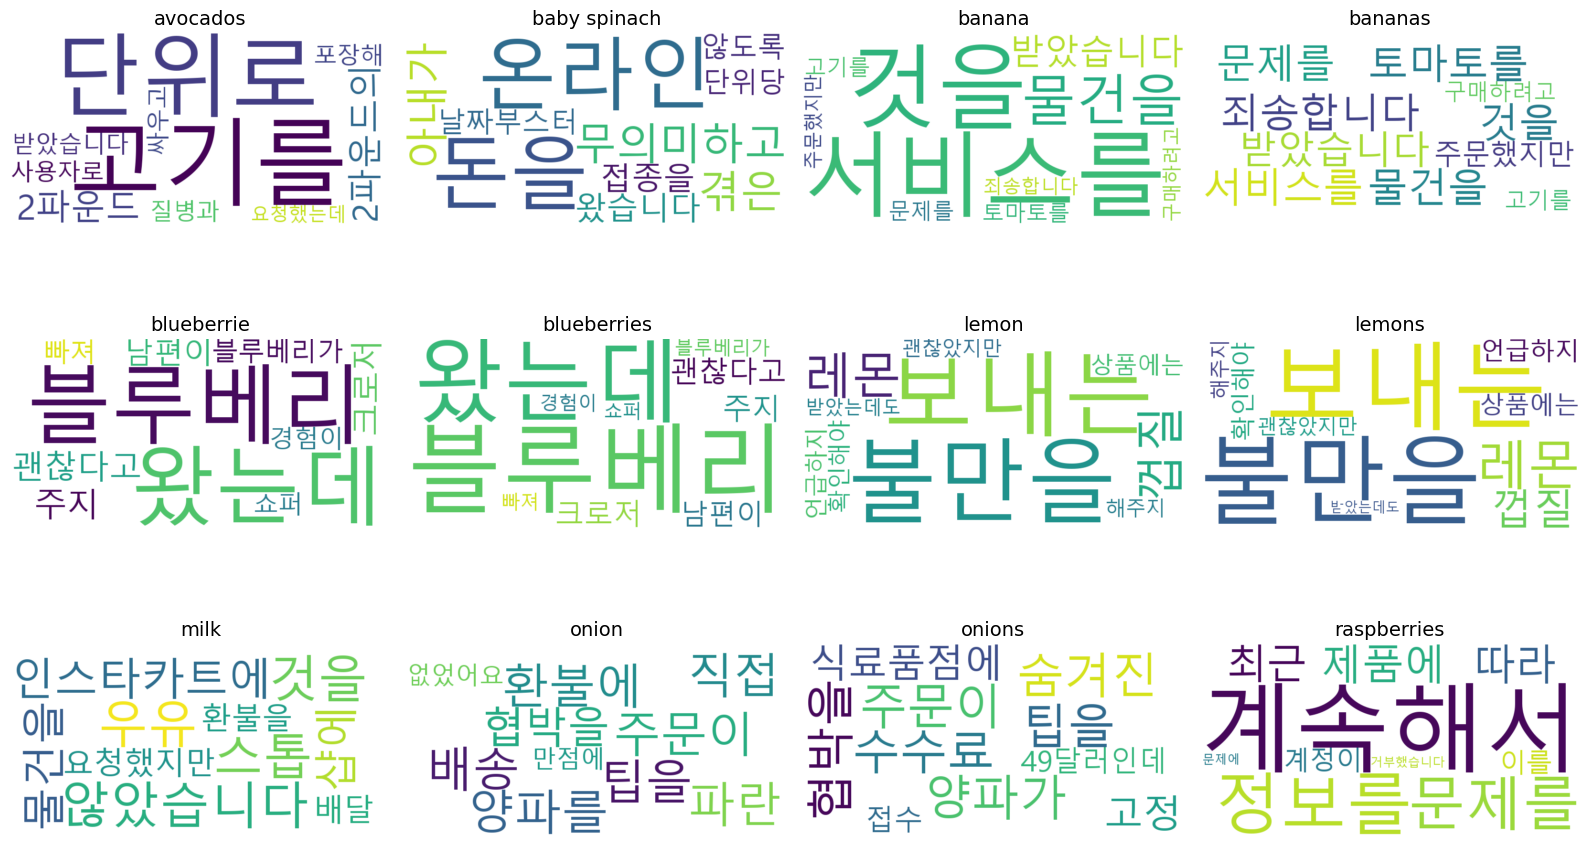

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.figure(figsize=(16, 10))

# Ï†úÌíàÎ≥Ñ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
for idx, row in df_tfidf_final.iterrows():
    product = row['product']
    keywords = row['tfidf_keywords']
    
    # ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏Î•º Í≥µÎ∞±ÏúºÎ°ú Ïó∞Í≤∞
    text = ' '.join(keywords)
    
    # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
    wordcloud = WordCloud(
        font_path='malgun.ttf',  # Windows ÏÇ¨Ïö©ÏûêÏùò Í≤ΩÏö∞ / Îß•ÏùÄ Ï†ÅÏ†àÌûà ÍµêÏ≤¥
        background_color='white',
        width=800,
        height=400
    ).generate(text)
    
    # Í∑∏ÎûòÌîÑ ÌëúÏãú
    plt.subplot(3, 4, idx + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(product, fontsize=14)

    if idx == 11:  # 12Í∞úÍπåÏßÄÎßå ÏãúÍ∞ÅÌôî
        break

plt.tight_layout()
plt.show()


- ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º ÌÜµÌï¥ÏÑú ÏãúÍ∞ÅÌôîÌïòÎãàÍπå Îçî ÏïÑÏâ¨ÏõÄ 

ÏßÄÍ∏à Ìï† Ïàò ÏûàÎäî Î≥¥ÏôÑ Î∞©Î≤ï: N-gram Í∏∞Î∞ò TF-IDF

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Ï†úÌíàÎ≥Ñ Î¶¨Î∑∞ Ìï©ÏπòÍ∏∞
documents = []
product_names = []

for product in mlb.classes_:
    product_reviews = df_onehot[df_onehot[product] == 1]['review'].dropna().astype(str)
    document = ' '.join(product_reviews)
    product_names.append(product)
    documents.append(document)

# 2-gram TF-IDF Ï†ÅÏö©
vectorizer = TfidfVectorizer(
    stop_words=korean_stopwords,
    max_features=1000,
    ngram_range=(2, 2)  # 2-gram
)
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# ÏÉÅÏúÑ 10Í∞ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
tfidf_top_keywords = []
for i in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[::-1][:10]
    keywords = [feature_names[idx] for idx in top_indices]
    tfidf_top_keywords.append(keywords)

# Í≤∞Í≥º Ï†ÄÏû•
df_bigram = pd.DataFrame({
    'product': product_names,
    'tfidf_bigrams': tfidf_top_keywords
})
df_bigram.head()


product                                      tfidf_bigrams
0      avocados  [2ÌååÏö¥Îìú Îã®ÏúÑÎ°ú, Ïó¨Îü¨ Ìï¥Î•º, ÏßÅÏõêÎì§Ïù¥ ÏïåÎ≤ÑÌä∏Ïä®Ïä§, Ï†ÄÏö∏ÏùÑ Íµ¨ÏûÖÌïòÏó¨, ÏïåÎ≤ÑÌä∏Ïä®Ïä§ ...
1  baby spinach  [Î¨¥ÏùòÎØ∏ÌïòÍ≥† ÎπÑÌö®Ïú®Ï†ÅÏù¥ÏóàÏäµÎãàÎã§, Í≤ÉÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§, ÎπÑÏö©Ïù¥ ÎπÑÏãº, Í≤©Î¶¨ÎêòÏñ¥ ÏôîÏäµÎãàÎã§...
2        banana  [Ï∂îÍ∞Ä ÌíàÎ™©Ïù¥, Î¨∏Ï†úÎ°ú Ïù∏Ìï¥, Î∂àÎßåÏóê ÎåÄÌïú, ÎåÄÌïú ÏùëÎãµÏù¥, Î∞õÏïòÍ≥† Î∂àÎßåÏóê, 2ÌååÏö¥Îìú...
3       bananas  [Ï∂îÍ∞Ä ÌíàÎ™©Ïù¥, Î∞õÏïòÍ≥† Î∂àÎßåÏóê, Î¨∏Ï†úÎ°ú Ïù∏Ìï¥, Î∂àÎßåÏóê ÎåÄÌïú, ÎåÄÌïú ÏùëÎãµÏù¥, Íµ¨Îß§ÌïòÎ†§...
4    blueberrie  [ÏáºÌçºÏùò Í≤ΩÌóòÏù¥, ÌïúÎã§Í≥† ÌñàÎäîÎç∞, Î∂ÄÏ°±Ìïú Í∞ôÏïòÍ≥†, Ï†úÎåÄÎ°ú Î∞õÏïÑÏÑú, Îß§Ïö∞ Î¨¥Î°ÄÌñàÏäµÎãàÎã§...

0620 

In [44]:
import pandas as pd
import re

# ÏòàÏãú: 'review' Ïª¨ÎüºÏù¥ ÏûàÎäî DataFrame
df['sentences'] = df['review'].apply(lambda x: re.split('[.!?]', x))  # Î¨∏Ïû• Îã®ÏúÑ ÎÇòÎàÑÍ∏∞
df = df.explode('sentences')  # Î¨∏Ïû•Î≥ÑÎ°ú ÎÇòÎàÑÍ∏∞
df['sentences'] = df['sentences'].str.strip()  # Í≥µÎ∞± Ï†úÍ±∞
df = df[df['sentences'].str.len() > 3]  # ÎÑàÎ¨¥ ÏßßÏùÄ Î¨∏Ïû• Ï†úÍ±∞

In [45]:
from konlpy.tag import Okt

okt = Okt()

# Î∂àÏö©Ïñ¥ ÏòàÏãú
stopwords = ['Ï†ïÎßê', 'ÏßÑÏßú', 'ÎÑàÎ¨¥', 'Í±∞Ïùò', 'Í∑∏ÎÉ•', 'Ï¢Ä', 'Í≤É', 'Í±∞', 'ÏóêÏÑú', 'ÏúºÎ°ú', 'ÌïòÍ≤å', 'Ìï¥ÏÑú']

# ÌÜ†ÌÅ∞Ìôî Î∞è Î∂àÏö©Ïñ¥ Ï†úÍ±∞
def clean_and_tokenize(text):
    tokens = okt.pos(text, stem=True)  # ÌíàÏÇ¨ Ï†ïÎ≥¥ Ìè¨Ìï®
    cleaned = [word for word, tag in tokens 
               if tag in ['Noun', 'Verb', 'Adjective'] and word not in stopwords]
    return cleaned

df['tokens'] = df['sentences'].apply(clean_and_tokenize)


In [46]:
negative_keywords = ['ÎäêÎ¶¨Îã§', 'Îñ®Ïñ¥ÏßÄÎã§', 'Ï∞¢Ïñ¥ÏßÄÎã§', 'Î∂àÌé∏ÌïòÎã§', 'ÏãúÎì§Îã§', 'ÏùµÎã§', 'ÏóÜÎã§', 'ÏÉÅÌïòÎã§', 'ÎçîÎüΩÎã§', 'Ïù¥ÏÉÅÌïòÎã§']

# Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïó¨Î∂Ä
df['is_negative'] = df['tokens'].apply(lambda tokens: any(neg in tokens for neg in negative_keywords))

# Î∂àÎßå Î¶¨Î∑∞Îßå Îî∞Î°ú Ï∂îÏ∂ú
df_negative = df[df['is_negative']]


In [47]:
from collections import Counter

# Î™®Îì† Î∂àÎßå Î¨∏Ïû• ÌÜ†ÌÅ∞ Ìï©ÏπòÍ∏∞
all_tokens = df_negative['tokens'].explode()
token_counts = Counter(all_tokens)

# ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÌôïÏù∏
token_counts.most_common(30)


[('ÌïòÎã§', 58),
 ('ÏóÜÎã§', 43),
 ('Ï£ºÎ¨∏', 20),
 ('Ïàò', 17),
 ('ÏûàÎã§', 17),
 ('Ïù∏Ïä§ÌÉÄ', 11),
 ('Ïπ¥Ìä∏', 11),
 ('Î∞õÎã§', 9),
 ('Í∞ÄÎã§', 8),
 ('Î¨∏Ï†ú', 7),
 ('ÎêòÎã§', 7),
 ('ÏáºÌçº', 6),
 ('ÏÇ¨Ïö©', 6),
 ('ÌôòÎ∂à', 6),
 ('Ïö∞Ïú†', 6),
 ('ÎßéÎã§', 6),
 ('Í∞ÄÍ≤å', 6),
 ('Îïå', 5),
 ('ÎêòÏñ¥Îã§', 5),
 ('ÏáºÌïë', 5),
 ('ÏÉÅÌíà', 5),
 ('ÏÑúÎπÑÏä§', 5),
 ('ÏöîÏ≤≠', 4),
 ('ÏùëÎãµ', 4),
 ('Ï†úÌíà', 4),
 ('ÎåÄÌïú', 4),
 ('ÎåÄÏ≤¥', 4),
 ('Î¨ºÌíà', 4),
 ('Îßê', 4),
 ('Ïù¥Îã§', 4)]

In [48]:
# Î∂ÑÏÑùÏóê Ïì∏ ÌÇ§ÏõåÎìúÎßå ÌïÑÌÑ∞ÎßÅ
meaningful_keywords = [
    'Ï£ºÎ¨∏', 'ÌôòÎ∂à', 'ÏáºÌçº', 'ÏÉÅÌíà', 'ÏÑúÎπÑÏä§', 'ÏöîÏ≤≠', 'ÏùëÎãµ', 'ÎåÄÏ≤¥', 'Î¨ºÌíà', 'Ï†úÌíà',
    'Î¨∏Ï†ú', 'ÏÇ¨Ïö©', 'ÏáºÌïë', 'Ïö∞Ïú†', 'Î†àÎ™¨', 'Î∞îÎÇòÎÇò', 'ÏãúÍ∏àÏπò', 'Îî∏Í∏∞', 'ÏñëÌåå'
]

df_filtered = df_negative.copy()
df_filtered['filtered_tokens'] = df_filtered['tokens'].apply(
    lambda tokens: [t for t in tokens if t in meaningful_keywords]
)


Î¶¨Î∑∞ ‚Üí Î¨∏Ïû• Îã®ÏúÑ Î∂ÑÎ¶¨ ‚Üí ÌÜ†ÌÅ∞Ìôî + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ‚Üí ÏùòÎØ∏ ÏûàÎäî ÌÇ§ÏõåÎìúÎßå ÌïÑÌÑ∞ÎßÅ (filtered_tokens)

In [51]:
# Ïòà: Ïö∞Ïú†, ÌôòÎ∂à Îì± ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú Î¨∏Ïû•Îßå Ï∂îÏ∂ú
df_filtered['matched_keywords'] = df_filtered['filtered_tokens'].apply(lambda x: ', '.join(x))

# ÌÇ§ÏõåÎìúÎ≥ÑÎ°ú Ïñ¥Îñ§ Î¨∏Ïû•Ïù¥ ÏûàÏóàÎäîÏßÄ Î≥¥Í∏∞
for keyword in meaningful_keywords:
    print(f"\nüîç {keyword.upper()} Í¥ÄÎ†® Î¨∏Ïû•Îì§")
    subset = df_filtered[df_filtered['filtered_tokens'].apply(lambda tokens: keyword in tokens)]
    for s in subset['sentences'].head(5):  # ÏÉÅÏúÑ 5Í∞úÏî© ÏòàÏãú Ï∂úÎ†•
        print("-", s)



üîç Ï£ºÎ¨∏ Í¥ÄÎ†® Î¨∏Ïû•Îì§
- 10Îã¨Îü¨ Ìï†Ïù∏ Ïø†Ìè∞ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÎç∞ Îëê Î≤àÏß∏ Ï£ºÎ¨∏ÏóêÎäî Í±∞Î∂ÄÎãπÌñàÍ≥† ÌôòÎ∂àÏùÑ Î∞õÏùÑ Ïàò ÏóÜÏóàÏäµÎãàÎã§
- ÎØ∏Ïπú ÎìØÌïú Î¨∏Ï†úÎ•º ÏßëÏúºÎ°ú Í∞ÄÏ†∏Ïò§Îäî Í≤ÉÏùÄ ÏÉÅÎãπÌïú Î¨∏Ï†úÎ•º ÏïºÍ∏∞ÌñàÏúºÎ©∞ ÏûòÎ™ªÎêú Î¨ºÍ±¥ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÏóàÏäµÎãàÎã§
- Îçî ÎßéÏùÄ Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏ ÌåÅÏùÑ ÏöîÏ≤≠ÌïòÍ≥† Ï£ºÎ¨∏ÏùÑ Ìï† Îïå Î∂àÌé∏ÌñàÏäµÎãàÎã§
- Í∑∏Îü∞Îç∞ Ïù¥Î≤àÏóêÎäî ÎÇ®ÏûêÍ∞Ä Ï£ºÎ¨∏Ìïú ÎßéÏùÄ Î¨ºÍ±¥Îì§ Ï§ë ÏùºÎ∂ÄÍ∞Ä ÏóÜÎã§Í≥† ÌëúÏãúÌñàÍ≥†, ÏµúÏïÖÏùò ÎåÄÏ≤¥ÌíàÏùÑ Í≥®ÎûêÏñ¥Ïöî
- ÏõêÎûò Ï£ºÎ¨∏Ìïú Í≤É ÎåÄÏã†Ïóê ÏπòÌÇ® Ìå©ÏùÑ Î∞õÏïòÎäîÎç∞, Í∞ÄÍ≤©Ïù¥ Îã§Î•¥Í≥† Îã§Î•∏ Í≤ÉÎì§ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÎã§Í≥† ÌëúÏãúÌñàÏñ¥Ïöî

üîç ÌôòÎ∂à Í¥ÄÎ†® Î¨∏Ïû•Îì§
- 10Îã¨Îü¨ Ìï†Ïù∏ Ïø†Ìè∞ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÎç∞ Îëê Î≤àÏß∏ Ï£ºÎ¨∏ÏóêÎäî Í±∞Î∂ÄÎãπÌñàÍ≥† ÌôòÎ∂àÏùÑ Î∞õÏùÑ Ïàò ÏóÜÏóàÏäµÎãàÎã§
- ÌôòÎ∂à Í∏∞Î°ùÏù¥ ÏóÜÏäµÎãàÎã§
- Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Îäî ÌôòÎ∂àÏùÑ Ìï¥Ï£ºÏóàÏßÄÎßå, Ïú†Í∞êÏä§ÎüΩÍ≤åÎèÑ ÏáºÌçºÎì§ÏùÄ ÏàòÏàòÎ£åÎ•º Î∞õÏùÑ Í∞ÄÏπòÍ∞Ä ÏóÜÎã§
- ÎßàÏπ®ÎÇ¥ ÌôòÎ∂àÏùÑ Î∞õÏïòÏßÄÎßå Î∞∞ÏÜ°ÎπÑÏôÄ

1. Keyword+Context Í∏∞Î∞ò Î¨∏Ïû• Ï∂îÏ∂ú + ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (TF-IDF + KMeans)
- ÎπÑÏä∑Ìïú Ïú†ÌòïÏùò Î∂àÎßåÏùÑ ÏûêÎèôÏúºÎ°ú Î¨∂Îäî Î∞©Ïãù
- (Ïòà: ‚ÄúÏö∞Ïú†Í∞Ä ÏóÜÎã§‚Äù, ‚ÄúÏö∞Ïú† ÎàÑÎùΩ‚Äù, ‚ÄúÏö∞Ïú† Ïïà Ïò¥‚Äù ‚Üí Í∞ôÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞)

- ÌïµÏã¨ ÏïÑÏù¥ÎîîÏñ¥:
- TF-IDFÎ°ú Î¨∏Ïû•ÏùÑ Î≤°ÌÑ∞Ìôî ‚Üí KMeansÎ°ú Î¨∂Í∏∞ ‚Üí Ï£ºÏöî ÌÇ§ÏõåÎìúÎ°ú ÏöîÏïΩ

- ‚û° ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Ïú†ÏÇ¨ Î¨∏Ïû•Îì§Ïù¥ ÏûêÎèôÏúºÎ°ú Î¨∂Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê
- ‚û° ‚Üí ÏàòÏûëÏóÖ ÏóÜÏù¥ Î∂àÎßå Ïú†ÌòïÏùÑ Í∑∏Î£πÌôîÌïòÍ≥† ÏöîÏïΩÌï† Ïàò ÏûàÏñ¥Ïöî.

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 1. Î∂àÎßå Î¨∏Ïû• Î≤°ÌÑ∞Ìôî
corpus = df_filtered['sentences'].tolist()
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus)

# 2. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
k = 5  # Î∂àÎßå Ïú†Ìòï 5Í∞úÎ°ú Í∞ÄÏ†ï
model = KMeans(n_clusters=k, random_state=42)
df_filtered['cluster'] = model.fit_predict(X)

# 3. Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎåÄÌëú ÌÇ§ÏõåÎìú Î≥¥Í∏∞
import numpy as np
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    print(f"\nüìå Cluster {i} Ï£ºÏöî ÌÇ§ÏõåÎìú:")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=', ')



üìå Cluster 0 Ï£ºÏöî ÌÇ§ÏõåÎìú:
Ï£ºÎ¨∏Ìïú, Î¨∏Ï†úÎ•º, ÏóÜÎã§Í≥†, Ï£ºÎ¨∏Ìï†, ÏµúÏïÖÏùò, Ïù¥Î≤àÏóêÎäî, Í∑∏Îü∞Îç∞, Í≥®ÎûêÏñ¥Ïöî, ÏùºÎ∂ÄÍ∞Ä, ÌëúÏãúÌñàÍ≥†, 
üìå Cluster 1 Ï£ºÏöî ÌÇ§ÏõåÎìú:
Í∞ÄÍ≤åÏóê, ÌñàÏßÄÎßå, Í∞ÄÏÑú, ÏóÜÎã§Í≥†, Î≥¥ÎÇ¥ÏÑú, ÏßÅÏõêÏùÄ, Î∏îÎ£®Î≤†Î¶¨Í∞Ä, Í¥úÏ∞ÆÎã§Í≥†, Î©îÏãúÏßÄÎ•º, ÌôîÏû•ÏßÄ, 
üìå Cluster 2 Ï£ºÏöî ÌÇ§ÏõåÎìú:
ÏóÜÏóàÏäµÎãàÎã§, ÎåÄÌïú, Î∂àÎßåÏóê, Î∞õÏïòÍ≥†, ÏùëÎãµÏù¥, ÏõπÏÇ¨Ïù¥Ìä∏ÏóêÎèÑ, ÏïÑÎ¨¥Í≤ÉÎèÑ, ÏÑúÎπÑÏä§, ÏÑ¨Ïú†ÏßàÏù¥, ÎßéÍ≥†, 
üìå Cluster 3 Ï£ºÏöî ÌÇ§ÏõåÎìú:
Ï£ºÎ¨∏ÏùÑ, ÏóÜÏäµÎãàÎã§, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏, ÌåÅÏùÑ, ÏóÜÏóàÏñ¥Ïöî, ÌôòÎ∂àÏùÑ, Í≥†Í∞ù, 2025ÎÖÑ, ÌôòÎ∂à, Í∏∞Î°ùÏù¥, 
üìå Cluster 4 Ï£ºÏöî ÌÇ§ÏõåÎìú:
ÏöîÏ≤≠ÌñàÏßÄÎßå, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Ïóê, Ïó∞ÎùΩÌñàÏùÑ, ÏÉµÏóê, ÎïåÎäî, ÎèÑÏõÄÏùÑ, Ïä§ÌÜ±, ÏùëÎãµÏù¥, Í∞îÎã§Í∞Ä, ÏóÜÏóàÏäµÎãàÎã§, 

- ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥ ÏûòÎêúÍ±¥ÏßÄ Î™®Î•¥Í≤†Ïùå 
: ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥Î∂Ä Î¨∏Ïû•Îì§Ïù¥ Ï†ïÎßê Ïú†ÏÇ¨ÌïúÏßÄ Î≥¥Í∏∞

In [56]:
for i in range(k):  # k = ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞úÏàò
    print(f"\nüü° ÌÅ¥Îü¨Ïä§ÌÑ∞ {i} ÎåÄÌëú Î¨∏Ïû•:")
    cluster_examples = df_filtered[df_filtered['cluster'] == i]['sentences'].head(5)
    for sent in cluster_examples:
        print(" -", sent)


üü° ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 ÎåÄÌëú Î¨∏Ïû•:
 - ÎØ∏Ïπú ÎìØÌïú Î¨∏Ï†úÎ•º ÏßëÏúºÎ°ú Í∞ÄÏ†∏Ïò§Îäî Í≤ÉÏùÄ ÏÉÅÎãπÌïú Î¨∏Ï†úÎ•º ÏïºÍ∏∞ÌñàÏúºÎ©∞ ÏûòÎ™ªÎêú Î¨ºÍ±¥ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÏóàÏäµÎãàÎã§
 - Í∑∏Îü∞Îç∞ Ïù¥Î≤àÏóêÎäî ÎÇ®ÏûêÍ∞Ä Ï£ºÎ¨∏Ìïú ÎßéÏùÄ Î¨ºÍ±¥Îì§ Ï§ë ÏùºÎ∂ÄÍ∞Ä ÏóÜÎã§Í≥† ÌëúÏãúÌñàÍ≥†, ÏµúÏïÖÏùò ÎåÄÏ≤¥ÌíàÏùÑ Í≥®ÎûêÏñ¥Ïöî
 - ÏõêÎûò Ï£ºÎ¨∏Ìïú Í≤É ÎåÄÏã†Ïóê ÏπòÌÇ® Ìå©ÏùÑ Î∞õÏïòÎäîÎç∞, Í∞ÄÍ≤©Ïù¥ Îã§Î•¥Í≥† Îã§Î•∏ Í≤ÉÎì§ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÎã§Í≥† ÌëúÏãúÌñàÏñ¥Ïöî
 - ÏßÅÏõêÎì§Í≥º Í¥ÄÎ†®Îêú Î∂ÄÏ†ïÏ†Å Î¨∏Ï†úÎ•º ÏûêÏÑ∏Ìûà Ïñ∏Í∏âÌïú Î¶¨Î∑∞ÏòÄÎäîÎç∞, Í≥ºÍ±∞Ïóê Ï£ºÎ¨∏Ìïú ÏãùÎ£åÌíàÏù¥ Ïû¨Í≥†Í∞Ä ÏóÜÎã§Í≥† ÎßêÌñàÏäµÎãàÎã§
 - Ï£ºÎ¨∏Ìïú ÏÉÅÌíà Ï§ë ÌïòÎÇòÎ•º Ï†úÍ±∞ÌïòÎäî Î∞©Î≤ïÏù¥ ÏóÜÏóàÍ≥† Í≥†Ï†ï ÏÜåÎìùÏùÑ Î∞õÎäî ÎÖ∏Ïù∏Îì§Ïù¥ ÏòàÏÇ∞ÏùÑ ÏßÄÌÇ§Í∏∞ Ïñ¥Î†§Ïõ†ÏäµÎãàÎã§

üü° ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 ÎåÄÌëú Î¨∏Ïû•:
 - ÎÇ®Ìé∏Ïù¥ Îçî Ïù¥ÏÉÅ Ïö¥Ï†ÑÏùÑ Ìï† Ïàò ÏóÜÏñ¥ ÏïåÎîî Í∞ÄÍ≤åÏóê Í∞ÄÏÑú Ïû•ÏùÑ ÏÇ¥ Ïàò ÏóÜÏùÑ Îïå, ÏÑ†ÌÉùÏùò Ïó¨ÏßÄÍ∞Ä ÏóÜÏóàÏäµÎãàÎã§
 - Í∞ÄÍ≤åÏóê Í∞ÄÏÑú ÏáºÌïëÏùÑ ÌïòÍ≥† Í∞ÄÍπåÏö¥ Í≥≥ÏóêÏÑú ÌîΩÏóÖÌïòÎùºÍ≥† ÌñàÏß

ÎåÄÌëú ÌÇ§ÏõåÎìú ÎπÑÍµê (Ï†ïÎüâÏ†Å ÌôïÏù∏)

In [57]:
from collections import Counter

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Îã®Ïñ¥ Ï∂úÎ†•
for i in range(k):
    print(f"\nüß© ÌÅ¥Îü¨Ïä§ÌÑ∞ {i} Ï£ºÏöî ÌÇ§ÏõåÎìú:")
    token_list = df_filtered[df_filtered['cluster'] == i]['filtered_tokens'].explode()
    top_keywords = Counter(token_list).most_common(10)
    print(top_keywords)



üß© ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 Ï£ºÏöî ÌÇ§ÏõåÎìú:
[('Ï£ºÎ¨∏', 6), ('Î¨∏Ï†ú', 3), ('ÎåÄÏ≤¥', 1), ('ÏÉÅÌíà', 1)]

üß© ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 Ï£ºÏöî ÌÇ§ÏõåÎìú:
[('ÏáºÌïë', 2), ('Î¨ºÌíà', 2), ('Ï£ºÎ¨∏', 2), (nan, 1), (nan, 1), ('Ïö∞Ïú†', 1)]

üß© ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 Ï£ºÏöî ÌÇ§ÏõåÎìú:
[('Ï£ºÎ¨∏', 2), ('ÏùëÎãµ', 2), ('Î¨∏Ï†ú', 2), ('ÏÑúÎπÑÏä§', 2), ('ÏÇ¨Ïö©', 1), ('ÌôòÎ∂à', 1), (nan, 1), (nan, 1), (nan, 1), ('Ïö∞Ïú†', 1)]

üß© ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 Ï£ºÏöî ÌÇ§ÏõåÎìú:
[('Ï£ºÎ¨∏', 10), ('ÏáºÌçº', 5), ('ÌôòÎ∂à', 5), ('ÏÇ¨Ïö©', 5), ('Ïö∞Ïú†', 4), ('Ï†úÌíà', 4), ('ÏÑúÎπÑÏä§', 3), ('Î¨∏Ï†ú', 2), ('Î¨ºÌíà', 2), ('ÏÉÅÌíà', 2)]

üß© ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 Ï£ºÏöî ÌÇ§ÏõåÎìú:
[('ÏöîÏ≤≠', 3), ('ÏùëÎãµ', 2), ('ÏáºÌïë', 2), ('ÏÉÅÌíà', 2), ('ÎåÄÏ≤¥', 2), ('ÏáºÌçº', 1)]


| ÌÅ¥Îü¨Ïä§ÌÑ∞ | Ï£ºÏöî Ï£ºÏ†ú Ï∂îÏ†ï                 | Î¨∏Ïû• Ïú†ÏÇ¨ÎèÑ | ÌÇ§ÏõåÎìú ÏùºÏπòÎèÑ | ÌèâÍ∞Ä       |
| ---- | ------------------------ | ------ | ------- | -------- |
| 0Î≤à   | **Ï£ºÎ¨∏ Ïã§Ìå® & ÎåÄÏ≤¥Ìíà Î∂àÎßå**       | Ïú†ÏÇ¨     | Î™ÖÌôï      | üëç Ï¢ãÏùå    |
| 1Î≤à   | **Îß§Ïû• ÏßÅÏ†ë Î∞©Î¨∏, ÌîΩÏóÖ Ïñ¥Î†§ÏõÄ**     | ÏïΩÍ∞Ñ Î∂ÑÏÇ∞Îê® | ÏïΩÌï®      | ‚ö†Ô∏è Î≥¥ÌÜµ    |
| 2Î≤à   | **Ïø†Ìè∞ Í±∞Ï†à, ÏùëÎãµ ÏóÜÏùå, ÏÑúÎπÑÏä§ Î∂àÎßå** | Ïú†ÏÇ¨     | Ï†ÅÏ†à      | üëç Ï¢ãÏùå    |
| 3Î≤à   | **ÏáºÌçº Î¨∏Ï†ú, ÌôòÎ∂à ÎàÑÎùΩ, Ï£ºÎ¨∏ Î¨∏Ï†ú**  | Ïú†ÏÇ¨     | Îß§Ïö∞ Î™ÖÌôï   | ‚úÖ Í∞ÄÏû• ÏïàÏ†ïÏ†Å |
| 4Î≤à   | **ÏöîÏ≤≠ÌñàÏßÄÎßå ÏùëÎãµ ÏóÜÏùå / ÎåÄÏ≤¥Ìíà Î¨∏Ï†ú** | Ïú†ÏÇ¨     | Î≥¥ÌÜµ      | üëç Ï¢ãÏùå    |


ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 / 2 / 3 / 4Îäî Î™ÖÌôïÌïú Ï£ºÏ†úÎ•º Í≥µÏú†ÌïòÍ≥† ÏûàÏñ¥Ïöî.

Ïòà:

0Î≤àÏùÄ "Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥"

2Î≤àÏùÄ "ÏùëÎãµ ÏóÜÏùå + ÏÑúÎπÑÏä§ Î¨∏Ï†ú"

3Î≤àÏùÄ "ÏáºÌçº Ïù¥Ïäà + ÌôòÎ∂à"

4Î≤àÏùÄ "ÏöîÏ≤≠ÌñàÏúºÎÇò ÏùëÎãµ ÏóÜÏùå / ÎåÄÏ≤¥Ìíà Î¨∏Ï†ú"

ÌÇ§ÏõåÎìúÎì§ÎèÑ Ï£ºÏ†úÏôÄ Ïûò ÎßûÎ¨ºÎ†§ ÏûàÏñ¥Ïöî (Ï£ºÎ¨∏, ÏùëÎãµ, ÌôòÎ∂à, ÎåÄÏ≤¥, ÏáºÌçº, ÏÑúÎπÑÏä§, Î¨ºÌíà Îì±)

 ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïù¥Î¶Ñ ÏßÅÏ†ë Î∂ôÏù¥Í∏∞

In [59]:
cluster_labels = {
    0: "Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà",
    1: "ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà",
    2: "Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå",
    3: "ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ",
    4: "ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà"
}
df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)


 ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩ Î¨∏Ïû• ÎßåÎì§Í∏∞ 

In [60]:
demand_templates = {
    0: "Ï†ïÌôïÌïú ÏÉÅÌíà Î∞∞ÏÜ°Í≥º Ï†ÅÏ†àÌïú ÎåÄÏ≤¥Ìíà ÏÑ†ÌÉùÏù¥ ÌïÑÏöîÌï®",
    1: "Îß§Ïû• Î∞©Î¨∏ ÏóÜÏù¥ ÏáºÌïëÏù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏãúÏä§ÌÖú Í∞úÏÑ† ÌïÑÏöî",
    2: "Ïø†Ìè∞/ÌôòÎ∂à Ïù¥ÏäàÏóê ÎåÄÌï¥ Îπ†Î•∏ Í≥†Í∞ù ÏùëÎåÄ Ï≤¥Í≥Ñ ÌïÑÏöî",
    3: "ÏáºÌçº ÍµêÏú° Í∞ïÌôî Î∞è ÌôòÎ∂à ÌîÑÎ°úÏÑ∏Ïä§ Ìà¨Î™ÖÌôî ÌïÑÏöî",
    4: "Í≥†Í∞ù ÏöîÏ≤≠Ïóê ÎåÄÌïú Ïã†ÏÜçÌïú ÏùëÎãµ Î∞è ÏÉÅÌíà ÎåÄÏ≤¥ Í∞úÏÑ† ÌïÑÏöî"
}
df_filtered['user_demand'] = df_filtered['cluster'].map(demand_templates)


ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤® + ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩÎ¨∏Ïû• Ï†ÅÏö© 

In [62]:
# Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú Î¨∏Ïû• 3Í∞ú + ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩ Í∞ôÏù¥ Î≥¥Í∏∞
for i in sorted(df_filtered['cluster'].unique()):
    print(f"\nüß© Cluster {i} - {cluster_labels[i]}")
    print(f" ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩ: {demand_templates[i]}")
    sample = df_filtered[df_filtered['cluster'] == i]['sentences'].head(3)
    for s in sample:
        print(" -", s)



üß© Cluster 0 - Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà
 ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩ: Ï†ïÌôïÌïú ÏÉÅÌíà Î∞∞ÏÜ°Í≥º Ï†ÅÏ†àÌïú ÎåÄÏ≤¥Ìíà ÏÑ†ÌÉùÏù¥ ÌïÑÏöîÌï®
 - ÎØ∏Ïπú ÎìØÌïú Î¨∏Ï†úÎ•º ÏßëÏúºÎ°ú Í∞ÄÏ†∏Ïò§Îäî Í≤ÉÏùÄ ÏÉÅÎãπÌïú Î¨∏Ï†úÎ•º ÏïºÍ∏∞ÌñàÏúºÎ©∞ ÏûòÎ™ªÎêú Î¨ºÍ±¥ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÏóàÏäµÎãàÎã§
 - Í∑∏Îü∞Îç∞ Ïù¥Î≤àÏóêÎäî ÎÇ®ÏûêÍ∞Ä Ï£ºÎ¨∏Ìïú ÎßéÏùÄ Î¨ºÍ±¥Îì§ Ï§ë ÏùºÎ∂ÄÍ∞Ä ÏóÜÎã§Í≥† ÌëúÏãúÌñàÍ≥†, ÏµúÏïÖÏùò ÎåÄÏ≤¥ÌíàÏùÑ Í≥®ÎûêÏñ¥Ïöî
 - ÏõêÎûò Ï£ºÎ¨∏Ìïú Í≤É ÎåÄÏã†Ïóê ÏπòÌÇ® Ìå©ÏùÑ Î∞õÏïòÎäîÎç∞, Í∞ÄÍ≤©Ïù¥ Îã§Î•¥Í≥† Îã§Î•∏ Í≤ÉÎì§ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÎã§Í≥† ÌëúÏãúÌñàÏñ¥Ïöî

üß© Cluster 1 - ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà
 ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩ: Îß§Ïû• Î∞©Î¨∏ ÏóÜÏù¥ ÏáºÌïëÏù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏãúÏä§ÌÖú Í∞úÏÑ† ÌïÑÏöî
 - ÎÇ®Ìé∏Ïù¥ Îçî Ïù¥ÏÉÅ Ïö¥Ï†ÑÏùÑ Ìï† Ïàò ÏóÜÏñ¥ ÏïåÎîî Í∞ÄÍ≤åÏóê Í∞ÄÏÑú Ïû•ÏùÑ ÏÇ¥ Ïàò ÏóÜÏùÑ Îïå, ÏÑ†ÌÉùÏùò Ïó¨ÏßÄÍ∞Ä ÏóÜÏóàÏäµÎãàÎã§
 - Í∞ÄÍ≤åÏóê Í∞ÄÏÑú ÏáºÌïëÏùÑ ÌïòÍ≥† Í∞ÄÍπåÏö¥ Í≥≥ÏóêÏÑú ÌîΩÏóÖÌïòÎùºÍ≥† ÌñàÏßÄÎßå Í∑∏Î†áÍ≤å Ìï† Ïàò ÏóÜÎã§Í≥† ÌñàÏäµÎãàÎã§
 - Î©îÏãúÏßÄÎ•º Î≥¥ÎÇ¥ÏÑú Í¥úÏ∞ÆÎã§Í≥

| Îã®Í≥Ñ                     | ÎÇ¥Ïö©                           |
| ---------------------- | ---------------------------- |
| 1. Î¶¨Î∑∞ Ï†ÑÏ≤òÎ¶¨              | Î¨∏Ïû• Î∂ÑÎ¶¨, Î∂àÏö©Ïñ¥ Ï†úÍ±∞, ÏùòÎØ∏ ÏûàÎäî ÌÇ§ÏõåÎìú ÌïÑÌÑ∞ÎßÅ |
| 2. Î∂àÎßå Î¨∏Ïû• ÌïÑÌÑ∞ÎßÅ           | Î∂ÄÏ†ï ÌÇ§ÏõåÎìú Í∏∞Î∞òÏúºÎ°ú Í∞êÏ†ï Î∂ÑÏÑù            |
| 3. TF-IDF Î≤°ÌÑ∞Ìôî + KMeans | ÏöîÍµ¨ÏÇ¨Ìï≠ ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏûêÎèô Î∂ÑÎ•ò              |
| 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†êÍ≤Ä             | ÎåÄÌëú Î¨∏Ïû•, Ï£ºÏöî ÌÇ§ÏõåÎìú, ÏùòÎØ∏ ÌÜµÏùºÏÑ± ÌôïÏù∏     |
| 5. ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩÎ¨∏ ÏûëÏÑ±         | Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏöîÏïΩÎ¨∏Ïû• Î∂ÄÏó¨              |
| 6. ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩÌëú Ï†ïÎ¶¨         | Ï∂îÌõÑ PPT/Î≥¥Í≥†ÏÑúÏö© Î∂ÑÏÑù Ìëú ÏôÑÏÑ±          |


In [108]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÎêú Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Î•º CSVÎ°ú Ï†ÄÏû•
df_filtered.to_csv("clustered_reviews.csv", index=False, encoding='utf-8-sig')

In [69]:
summary_table = (
    df_filtered.groupby(['cluster', 'cluster_label', 'user_demand'])
    .size()
    .reset_index(name='Î¨∏Ïû• Ïàò')
    .sort_values(by='Î¨∏Ïû• Ïàò', ascending=False)
    .reset_index(drop=True)  # Ïù¥ Ï§ÑÏù¥ ÌïµÏã¨!
)
summary_table.style.background_gradient(cmap='Blues').set_caption("ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩÌëú")

In [70]:

summary_table.head(10)  # ÎòêÎäî Í∑∏ÎÉ• summary_table

cluster     cluster_label                     user_demand  Î¨∏Ïû• Ïàò
0        3     ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ       ÏáºÌçº ÍµêÏú° Í∞ïÌôî Î∞è ÌôòÎ∂à ÌîÑÎ°úÏÑ∏Ïä§ Ìà¨Î™ÖÌôî ÌïÑÏöî    19
1        2   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå     Ïø†Ìè∞/ÌôòÎ∂à Ïù¥ÏäàÏóê ÎåÄÌï¥ Îπ†Î•∏ Í≥†Í∞ù ÏùëÎåÄ Ï≤¥Í≥Ñ ÌïÑÏöî    10
2        1       ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà    Îß§Ïû• Î∞©Î¨∏ ÏóÜÏù¥ ÏáºÌïëÏù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏãúÏä§ÌÖú Í∞úÏÑ† ÌïÑÏöî     6
3        0   Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà      Ï†ïÌôïÌïú ÏÉÅÌíà Î∞∞ÏÜ°Í≥º Ï†ÅÏ†àÌïú ÎåÄÏ≤¥Ìíà ÏÑ†ÌÉùÏù¥ ÌïÑÏöîÌï®     5
4        4  ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà  Í≥†Í∞ù ÏöîÏ≤≠Ïóê ÎåÄÌïú Ïã†ÏÜçÌïú ÏùëÎãµ Î∞è ÏÉÅÌíà ÎåÄÏ≤¥ Í∞úÏÑ† ÌïÑÏöî     4

In [107]:
summary_table

cluster     cluster_label                     user_demand  Î¨∏Ïû• Ïàò
0        3     ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ       ÏáºÌçº ÍµêÏú° Í∞ïÌôî Î∞è ÌôòÎ∂à ÌîÑÎ°úÏÑ∏Ïä§ Ìà¨Î™ÖÌôî ÌïÑÏöî    19
1        2   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå     Ïø†Ìè∞/ÌôòÎ∂à Ïù¥ÏäàÏóê ÎåÄÌï¥ Îπ†Î•∏ Í≥†Í∞ù ÏùëÎåÄ Ï≤¥Í≥Ñ ÌïÑÏöî    10
2        1       ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà    Îß§Ïû• Î∞©Î¨∏ ÏóÜÏù¥ ÏáºÌïëÏù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏãúÏä§ÌÖú Í∞úÏÑ† ÌïÑÏöî     6
3        0   Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà      Ï†ïÌôïÌïú ÏÉÅÌíà Î∞∞ÏÜ°Í≥º Ï†ÅÏ†àÌïú ÎåÄÏ≤¥Ìíà ÏÑ†ÌÉùÏù¥ ÌïÑÏöîÌï®     5
4        4  ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà  Í≥†Í∞ù ÏöîÏ≤≠Ïóê ÎåÄÌïú Ïã†ÏÜçÌïú ÏùëÎãµ Î∞è ÏÉÅÌíà ÎåÄÏ≤¥ Í∞úÏÑ† ÌïÑÏöî     4

ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú filtered_tokens ÏïàÏóê ÏûàÎäî ÌÇ§ÏõåÎìúÎ•º Î™®ÏïÑÏÑú, ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º ÏÉùÏÑ±

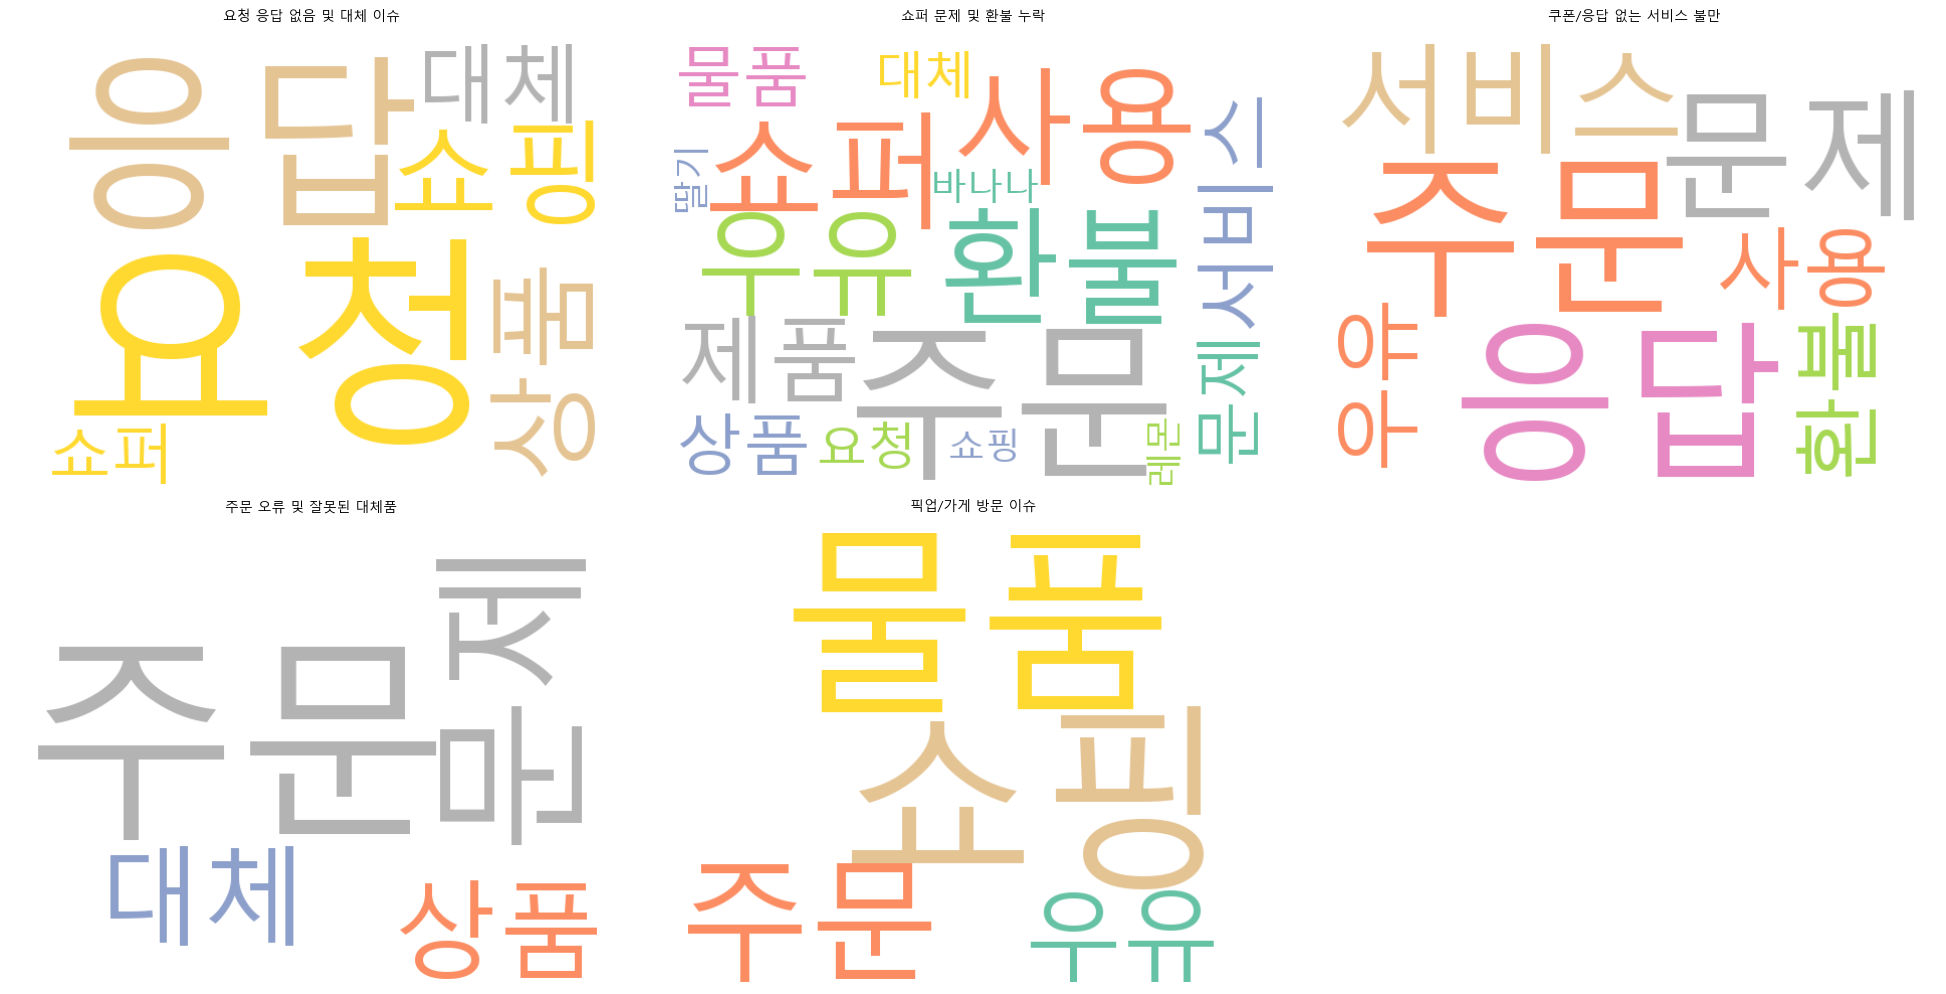

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict, Counter
import matplotlib.font_manager as fm

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú (Ïö¥ÏòÅÏ≤¥Ï†úÏóê Îî∞Îùº Í≤ΩÎ°ú Îã§Î•º Ïàò ÏûàÏùå)
font_path = "C:/Windows/Fonts/malgun.ttf"  # ÌïÑÏöî Ïãú malgun.ttf Îì±ÏúºÎ°ú ÏàòÏ†ï
font_prop = fm.FontProperties(fname=font_path)

# ‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌÇ§ÏõåÎìú Î™®ÏúºÍ∏∞
cluster_keywords = defaultdict(list)

for _, row in df_filtered.iterrows():
    label = row['cluster_label']  # ÎòêÎäî row['cluster'] ÏÇ¨Ïö© Í∞ÄÎä•
    cluster_keywords[label].extend(row['filtered_tokens'])

# ‚úÖ ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Í∏∞Î∞ò subplot Íµ¨ÏÑ±
num_clusters = len(cluster_keywords)
cols = 3
rows = (num_clusters + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()

# ‚úÖ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∑∏Î¶¨Í∏∞
for idx, (label, tokens) in enumerate(cluster_keywords.items()):
    word_freq = Counter(tokens)
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        colormap = 'Set2',#'tab10', #'Dark2'
        width=600,
        height=450,
        max_words=50
    ).generate_from_frequencies(word_freq)

    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].axis("off")
    axes[idx].set_title(
    label,
    fontsize=16,
    fontproperties=font_prop,
    pad=15
    )
    # ‚ùóÔ∏èÏ†úÎ™©Ïóê Ìè∞Ìä∏ ÏßÅÏ†ë Ï†ÅÏö© (ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ)
    axes[idx].set_title(
    label,
    fontsize=30,                # ‚¨ÖÔ∏è Ï†úÎ™© ÌÅ¨Í∏∞ ÌÇ§ÏõÄ
    fontproperties=font_prop,
    pad=15                      # ‚¨ÖÔ∏è Ï†úÎ™©Í≥º ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∞ÑÍ≤© ÌôïÎ≥¥
)
# ‚úÖ ÎÇ®Îäî Îπà Ïπ∏ subplot Ï†úÍ±∞
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


ÎåÄÏãúÎ≥¥ÎìúÏö© ÏÇ¨Ïö©Ïûê ÏöîÍµ¨ÏÇ¨Ìï≠ Ï∂îÏù¥ ÏãúÍ∞ÅÌôî

C:\Users\User\AppData\Local\Temp\ipykernel_16184\1212930494.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.tight_layout()


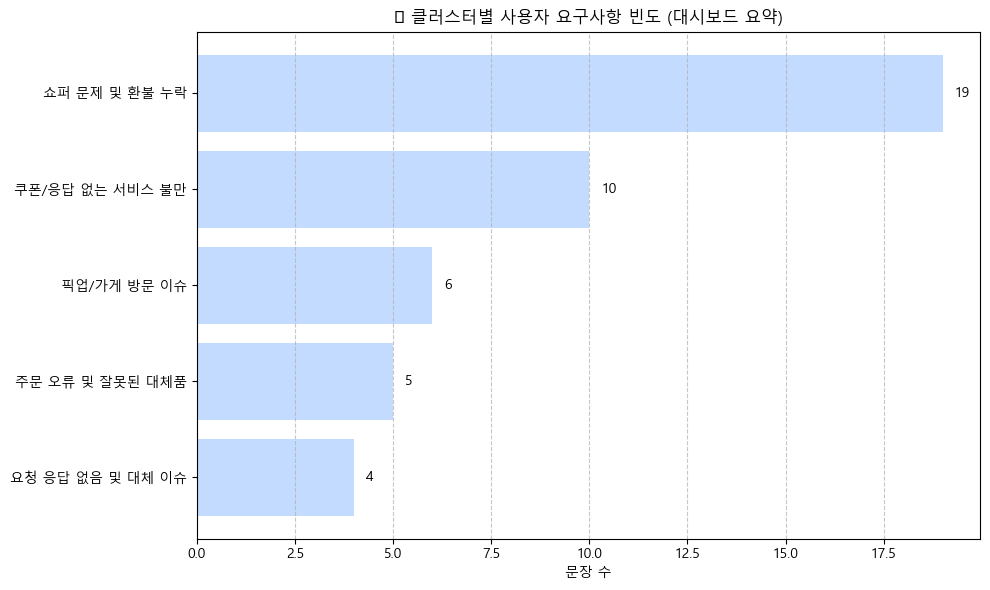

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
plt.rcParams['font.family'] = 'Malgun Gothic'  # ÎòêÎäî AppleGothic, NanumGothic Îì±

plt.figure(figsize=(10, 6))
bars = plt.barh(summary_table['cluster_label'], summary_table['Î¨∏Ïû• Ïàò'], color="#FFA07A")
plt.xlabel("Î¨∏Ïû• Ïàò")
plt.title("üìä ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÇ¨Ïö©Ïûê ÏöîÍµ¨ÏÇ¨Ìï≠ ÎπàÎèÑ (ÎåÄÏãúÎ≥¥Îìú ÏöîÏïΩ)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width()}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [99]:
from collections import Counter
import pandas as pd

# üëâ ÏÇ¨Ï†Ñ ÏûëÏóÖ: cluster_keywords ÎîïÏÖîÎÑàÎ¶¨Í∞Ä ÏûàÏñ¥Ïïº Ìï®!
# cluster_keywords = defaultdict(list)
# for _, row in df_filtered.iterrows():
#     cluster_keywords[row['cluster_label']].extend(row['filtered_tokens'])

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌïµÏã¨ ÌÇ§ÏõåÎìú TOP 5 Ï∂îÏ∂ú
top_keywords_per_cluster = []

for label, tokens in cluster_keywords.items():
    counter = Counter(tokens)
    top_keywords = counter.most_common(5)
    for keyword, count in top_keywords:
        top_keywords_per_cluster.append({
            'ÌÅ¥Îü¨Ïä§ÌÑ∞': label,
            'ÌÇ§ÏõåÎìú': keyword,
            'Îì±Ïû• ÌöüÏàò': count
        })

# ‚úÖ ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_top_keywords = pd.DataFrame(top_keywords_per_cluster)
df_top_keywords


ÌÅ¥Îü¨Ïä§ÌÑ∞  ÌÇ§ÏõåÎìú  Îì±Ïû• ÌöüÏàò
0   ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà   ÏöîÏ≤≠      3
1   ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà   ÏùëÎãµ      2
2   ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà   ÏáºÌïë      2
3   ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà   ÏÉÅÌíà      2
4   ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà   ÎåÄÏ≤¥      2
5      ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ   Ï£ºÎ¨∏     10
6      ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ   ÏáºÌçº      5
7      ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ   ÌôòÎ∂à      5
8      ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ   ÏÇ¨Ïö©      5
9      ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ   Ïö∞Ïú†      4
10   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå   Ï£ºÎ¨∏      2
11   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå   ÏùëÎãµ      2
12   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå   Î¨∏Ï†ú      2
13   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå  ÏÑúÎπÑÏä§      2
14   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå   ÏÇ¨Ïö©      1
15   Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà   Ï£ºÎ¨∏      6
16   Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà   Î¨∏Ï†ú      3
17   Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà   ÎåÄÏ≤¥      1
18   Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà   ÏÉÅÌíà      1
19       ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà   ÏáºÌïë      2
20       ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà   Î¨ºÌíà      2
21       ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà   Ï£ºÎ¨∏      2
22       ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà   Ïö∞Ïú†      1

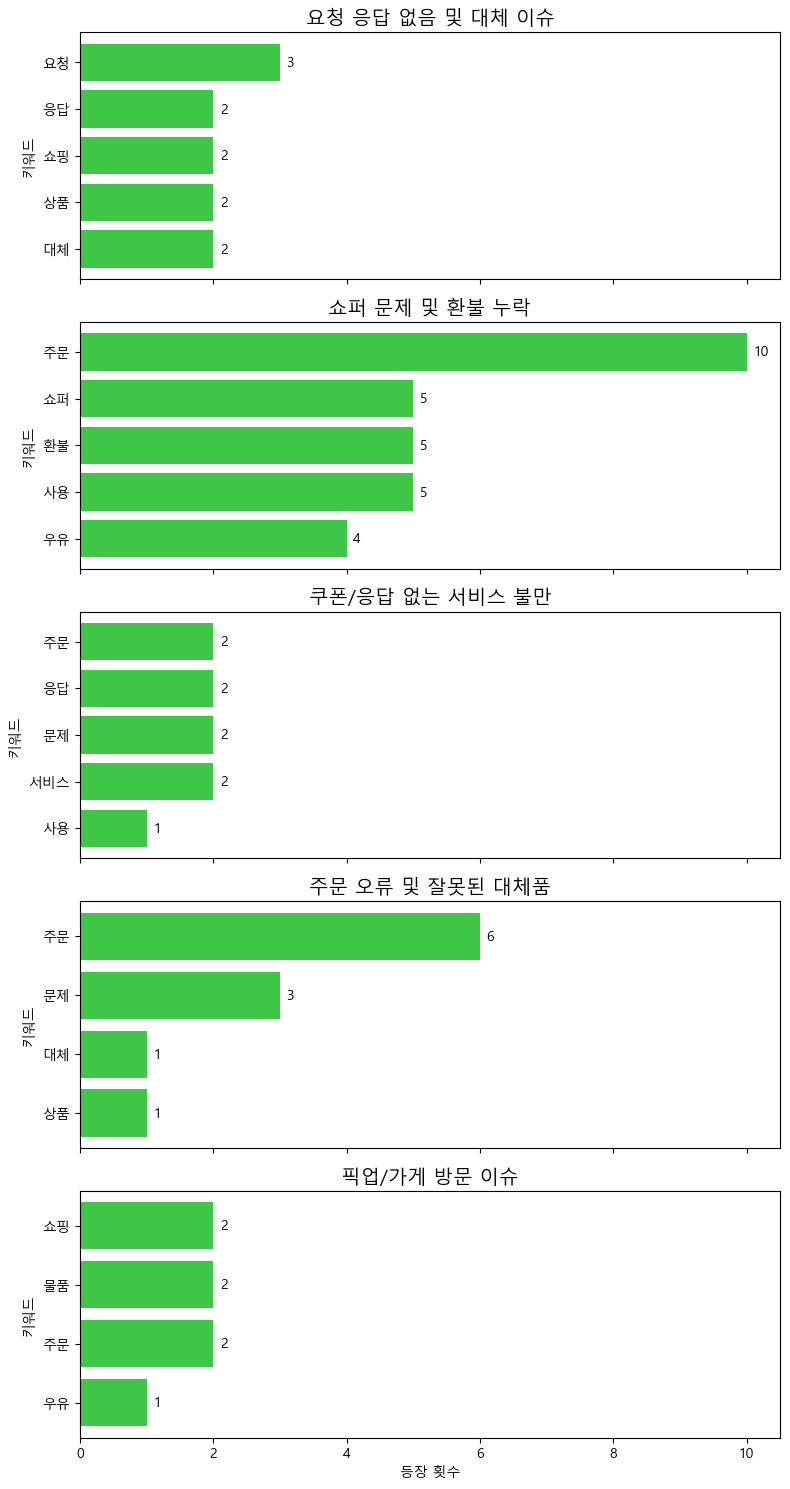

In [106]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (WindowsÏö©)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥ÑÎ°ú Í∞úÎ≥Ñ subplot Íµ¨ÏÑ±
clusters = df_top_keywords['ÌÅ¥Îü¨Ïä§ÌÑ∞'].unique()
num_clusters = len(clusters)

fig, axes = plt.subplots(num_clusters, 1, figsize=(8, 3 * num_clusters), sharex=True)

if num_clusters == 1:
    axes = [axes]

for i, cluster in enumerate(clusters):
    data = df_top_keywords[df_top_keywords['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster]
    bars = axes[i].barh(data['ÌÇ§ÏõåÎìú'], data['Îì±Ïû• ÌöüÏàò'], color="#3EC647")
    axes[i].set_title(f"{cluster}", fontproperties=font_prop, fontsize=14)
    axes[i].set_ylabel("ÌÇ§ÏõåÎìú", fontproperties=font_prop)
    axes[i].invert_yaxis()

    # ‚úÖ Ïà´Ïûê ÎùºÎ≤® Ï∂îÍ∞Ä (Í∞Å barÏóê ÎåÄÌï¥)
    for bar in bars:
        width = bar.get_width()
        axes[i].text(
            width + 0.1 ,  # ÎßâÎåÄ Ïò§Î•∏Ï™ΩÏóê Ïó¨Ïú† ÏûàÍ≤å
            bar.get_y() + bar.get_height() / 2,
            f"{int(width)}",
            va='center',
            fontsize=10,
            color='black'
        )

# ÎßàÏßÄÎßâ xÏ∂ï Î†àÏù¥Î∏îÎßå Ï∂îÍ∞Ä
axes[-1].set_xlabel("Îì±Ïû• ÌöüÏàò", fontproperties=font_prop)

plt.tight_layout()
plt.show()


In [109]:
from collections import defaultdict, Counter

# Top 10 ÏÉÅÌíà Î¶¨Ïä§Ìä∏ (ÏòàÏãú)
top10_products = ['Ïö∞Ïú†', 'Î†àÎ™¨', 'Î∞îÎÇòÎÇò', 'ÏãúÍ∏àÏπò', 'Îî∏Í∏∞', 'ÏñëÌåå', 'ÏáºÌçº', 'ÌôòÎ∂à', 'ÏÑúÎπÑÏä§', 'Ï£ºÎ¨∏']  # Ïã§Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏàòÏ†ïÌïòÏÑ∏Ïöî

# ÏÉÅÌíàÎ≥Ñ ÌÇ§ÏõåÎìú ÏàòÏßë
product_tokens = defaultdict(list)

for _, row in df_filtered.iterrows():
    for product in top10_products:
        if product in row['filtered_tokens']:  # Ìï¥Îãπ Î¨∏Ïû•Ïù¥ Ïù¥ ÏÉÅÌíàÏóê Í¥ÄÎ†®Îêú Í≤ΩÏö∞
            product_tokens[product].extend(row['filtered_tokens'])


‚ö†Ô∏è 'ÏãúÍ∏àÏπò'Ïóê ÎåÄÌïú ÌÜ†ÌÅ∞Ïù¥ ÏóÜÏñ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.
‚ö†Ô∏è 'ÏñëÌåå'Ïóê ÎåÄÌïú ÌÜ†ÌÅ∞Ïù¥ ÏóÜÏñ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.


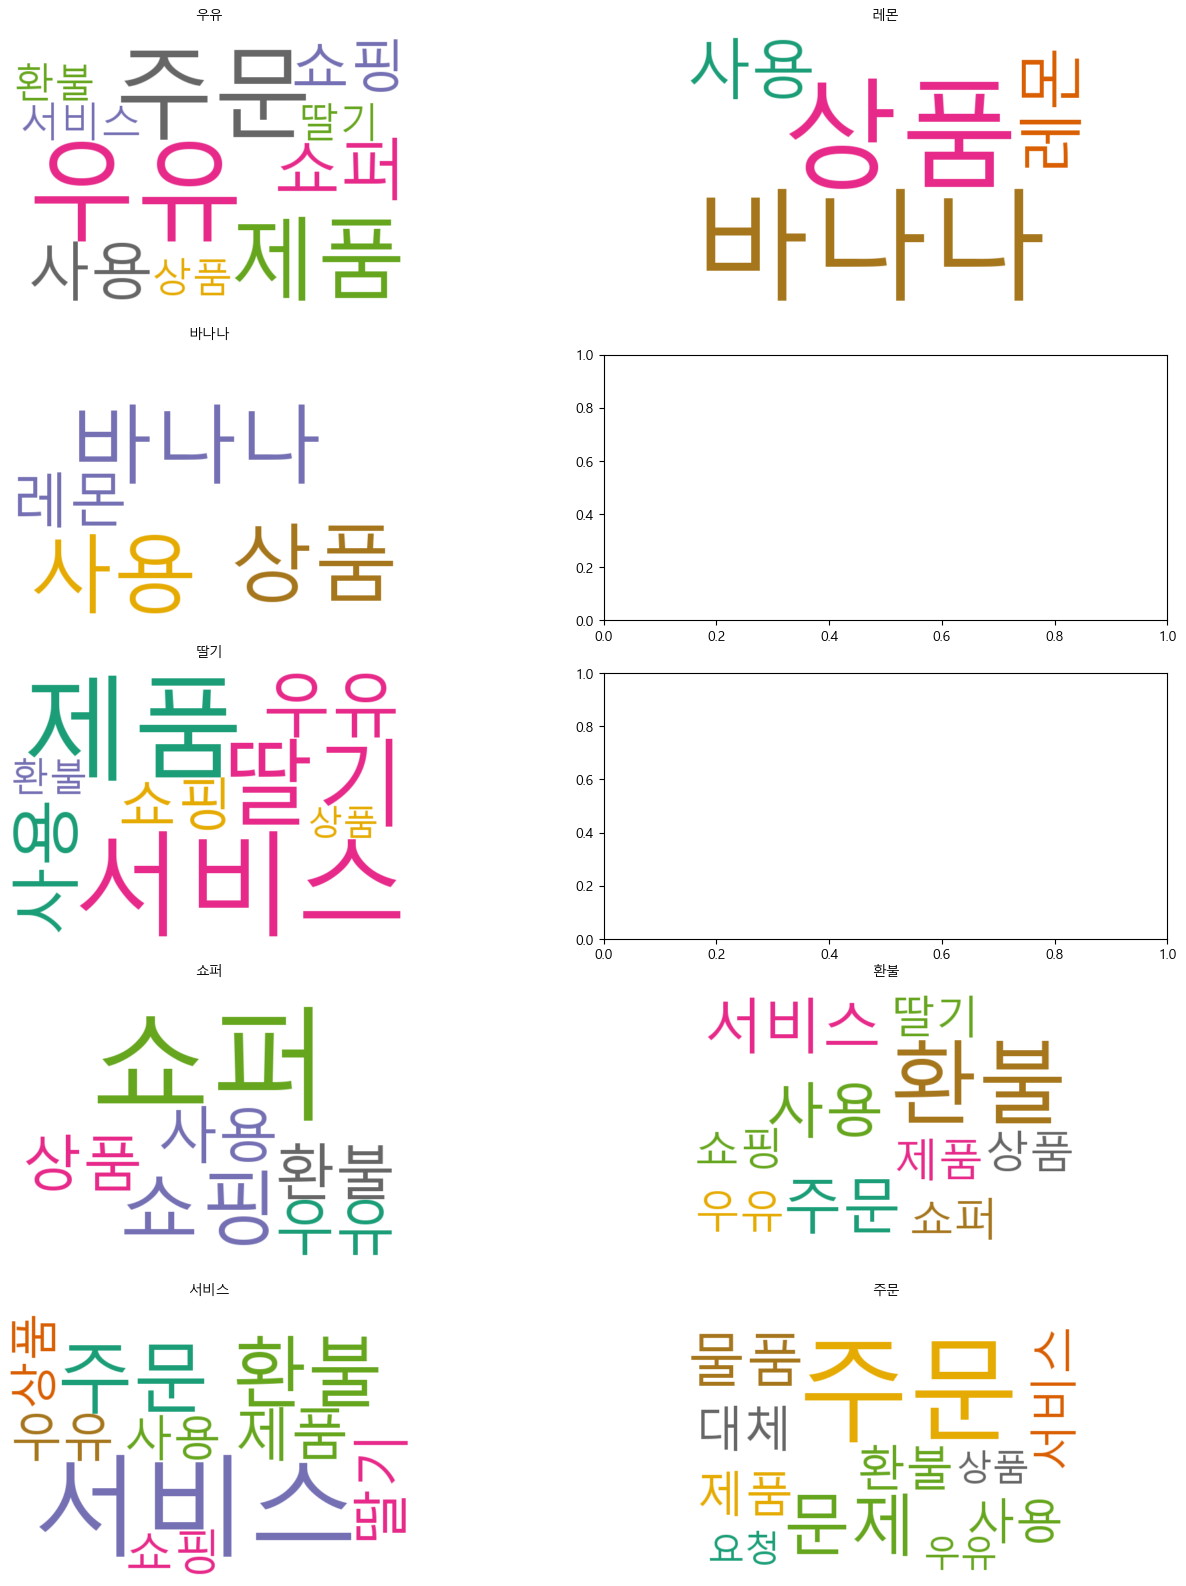

In [112]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# subplot ÏÑ§Ï†ï
cols = 2
rows = (len(top10_products) + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, product in enumerate(top10_products):
    tokens = product_tokens[product]
    word_freq = Counter(tokens)

    if len(word_freq) == 0:
        print(f"‚ö†Ô∏è '{product}'Ïóê ÎåÄÌïú ÌÜ†ÌÅ∞Ïù¥ ÏóÜÏñ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue  # ÎπÑÏñ¥ ÏûàÎäî Í≤ΩÏö∞ ÎÑòÏñ¥Í∞ÄÍ∏∞

    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=600,
        height=400,
        max_words=50,
        colormap='Dark2'
    ).generate_from_frequencies(word_freq)

    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(product, fontsize=18, fontproperties=font_prop, pad=12)



- Î≠îÍ∞Ä ÏïÑÏâΩÎÑ§

In [113]:
print(df_filtered.columns.tolist())

['rating', 'review', 'mentioned_products', 'sentences', 'tokens', 'is_negative', 'filtered_tokens', 'matched_keywords', 'cluster', 'cluster_label', 'user_demand']


In [114]:
sentence = row['review']  # ÎòêÎäî row['text'], row['sentence'] Îì±

In [115]:
# Î®ºÏ†Ä sentences Ïª¨ÎüºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥ÏÑú Î≥µÍµ¨
if 'sentences' not in df_filtered.columns:
    if 'review' in df_filtered.columns:
        import re
        df_filtered['sentences'] = df_filtered['review'].apply(lambda x: re.split('[.!?]', x))
        df_filtered = df_filtered.explode('sentences')
        df_filtered['sentences'] = df_filtered['sentences'].str.strip()

# Ïù¥ ÌõÑÏóê Îã§Ïãú ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú + ÎåÄÌëúÎ¨∏Ïû• ÏãúÍ∞ÅÌôî ÏΩîÎìú Ïã§ÌñâÌïòÎ©¥ Îê©ÎãàÎã§!


‚ö†Ô∏è 'ÏãúÍ∏àÏπò'Ïóê ÎåÄÌïú ÌÜ†ÌÅ∞Ïù¥ ÏóÜÏñ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.
‚ö†Ô∏è 'ÏñëÌåå'Ïóê ÎåÄÌïú ÌÜ†ÌÅ∞Ïù¥ ÏóÜÏñ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.


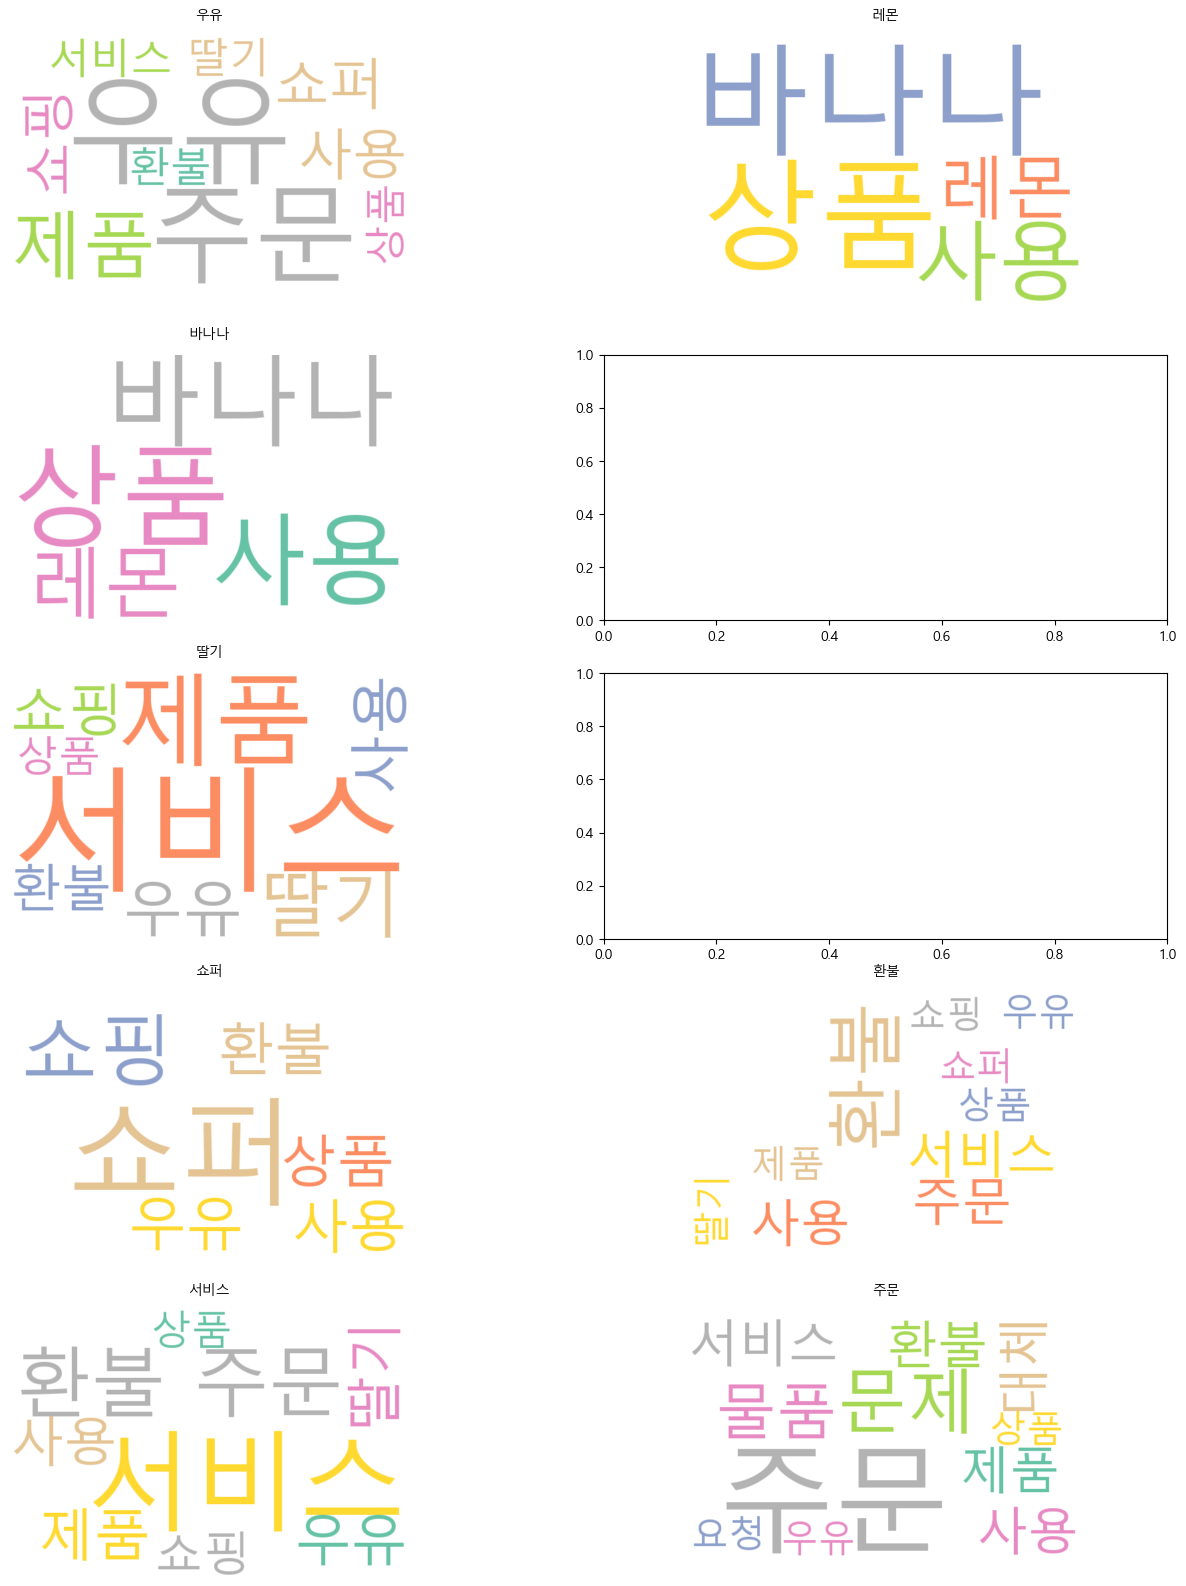

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# subplot ÏÑ§Ï†ï
cols = 2
rows = (len(top10_products) + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, product in enumerate(top10_products):
    tokens = product_tokens[product]
    word_freq = Counter(tokens)

    if len(word_freq) == 0:
        print(f"‚ö†Ô∏è '{product}'Ïóê ÎåÄÌïú ÌÜ†ÌÅ∞Ïù¥ ÏóÜÏñ¥ ÏõåÎìúÌÅ¥ÎùºÏö∞ÎìúÎ•º Í±¥ÎÑàÎúÅÎãàÎã§.")
        continue  # ÎπÑÏñ¥ ÏûàÎäî Í≤ΩÏö∞ ÎÑòÏñ¥Í∞ÄÍ∏∞

    wc = WordCloud(
        font_path=font_path,
        background_color='white',
        width=600,
        height=400,
        max_words=50,
        colormap='Set2'
    ).generate_from_frequencies(word_freq)

    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(product, fontsize=18, fontproperties=font_prop, pad=12)



-> Í≤∞Î°†Î∂ÄÌÑ∞ ÎßêÌïòÏûêÎ©¥ ÏÉÅÌíàÎ≥Ñ Ìè¨Ïû•Í≥º Í∞ôÏùÄ Î∂ÄÎ∂ÑÏóê ÎåÄÌïú Î¶¨Î∑∞Í∞Ä ÏóÜÏùå ,,,

In [119]:
# ÏÉÅÌíàÎ™ÖÍ≥º Î∂ÄÏ†ï ÌÇ§ÏõåÎìúÍ∞Ä ÎèôÏãúÏóê Îì§Ïñ¥Í∞Ñ Î¨∏Ïû• Ï∂îÏ∂ú
product_issue_examples = defaultdict(list)

for _, row in df_filtered.iterrows():
    sentence = row['sentences']
    tokens = row['filtered_tokens']
    for product in top10_products:
        if product in sentence:
            for neg in negative_keywords:
                if neg in tokens:
                    product_issue_examples[product].append(sentence)
                    break  # Ï§ëÎ≥µ Î∞©ÏßÄ


In [120]:
for product, sents in product_issue_examples.items():
    print(f"\nüì¶ {product} Í¥ÄÎ†® ÎåÄÌëú Î¨∏Ï†ú Î¨∏Ïû•:")
    for s in sents[:3]:
        print(f" - {s}")


In [ ]:
from collections import Counter

product_problem_keywords = {}

for product in product_issue_examples:
    keywords = []
    for sentence in product_issue_examples[product]:
        tokens = okt.pos(sentence, stem=True)
        keywords.extend([word for word, tag in tokens if tag in ['Noun', 'Adjective', 'Verb']])
    
    common = Counter(keywords).most_common(10)
    product_problem_keywords[product] = common

# ÏòàÏãú Ï∂úÎ†•
for p, kw_list in product_problem_keywords.items():
    print(f"\n {p} Í¥ÄÎ†® ÏûêÏ£º Ïñ∏Í∏âÎêú ÌÇ§ÏõåÎìú:")
    print(kw_list)  #  Ïó¨Í∏∞Í∞Ä print(kw) ‚Üí print(kw_list) Î°ú Î∞îÎÄåÏñ¥Ïïº Ìï®


In [ ]:
for p, kw_list in product_problem_keywords.items():
    print(f"\n {p} Í¥ÄÎ†® ÏûêÏ£º Ïñ∏Í∏âÎêú ÌÇ§ÏõåÎìú:")
    for kw, count in kw_list:
        print(f" - {kw}: {count}Ìöå")


In [126]:
print("‚úÖ Ï°¥Ïû¨ÌïòÎäî ÏÉÅÌíà + Î¨∏Ï†ú Î¨∏Ïû• Ï°∞Ìï© Ïàò:", len(product_issue_examples))

# Ïñ¥Îñ§ ÏÉÅÌíàÏóê Î™á Í∞úÏî© Îì§Ïñ¥Í∞îÎäîÏßÄ Î≥¥Í∏∞
for product in top10_products:
    print(f"{product}: {len(product_issue_examples[product])} Î¨∏Ïû•")


‚úÖ Ï°¥Ïû¨ÌïòÎäî ÏÉÅÌíà + Î¨∏Ï†ú Î¨∏Ïû• Ï°∞Ìï© Ïàò: 0
Ïö∞Ïú†: 0 Î¨∏Ïû•
Î†àÎ™¨: 0 Î¨∏Ïû•
Î∞îÎÇòÎÇò: 0 Î¨∏Ïû•
ÏãúÍ∏àÏπò: 0 Î¨∏Ïû•
Îî∏Í∏∞: 0 Î¨∏Ïû•
ÏñëÌåå: 0 Î¨∏Ïû•
ÏáºÌçº: 0 Î¨∏Ïû•
ÌôòÎ∂à: 0 Î¨∏Ïû•
ÏÑúÎπÑÏä§: 0 Î¨∏Ïû•
Ï£ºÎ¨∏: 0 Î¨∏Ïû•


In [127]:
if product in row['filtered_tokens']:
    for neg in negative_keywords:
        if neg in row['filtered_tokens']:
            product_issue_examples[product].append(row['sentences'])
            break


In [128]:
if product in row['filtered_tokens']:
    for neg in negative_keywords:
        if neg in row['sentences']:  # üëâ Î¨∏Ïû• Í∏∞Î∞ò
            product_issue_examples[product].append(row['sentences'])
            break


In [129]:
for _, row in df_filtered.iterrows():
    for product in top10_products:
        if product in row['filtered_tokens']:
            for neg in negative_keywords:
                if neg in row['sentences']:  # Î∂ÄÏ†ï Îã®Ïñ¥Í∞Ä Î¨∏Ïû• ÏïàÏóê ÏûàÏúºÎ©¥
                    product_issue_examples[product].append(row['sentences'])
                    break


In [130]:
for product, sents in product_issue_examples.items():
    if sents:
        print(f"\nüì¶ {product} ÎåÄÌëú Î¨∏Ïû•:")
        for s in sents[:3]:
            print(" -", s)



üì¶ Ïö∞Ïú† ÎåÄÌëú Î¨∏Ïû•:
 - ÏãúÍ∞ÑÏùÑ Î≥¥ÎÇ¥ÏÑú Ïó¨Îü¨ Î≤à Í∞ÄÍ≤åÏóê Í∞ÄÏÑú Ïö∞Ïú†Î•º ÏÇ¥ ÌïÑÏöîÍ∞Ä ÏóÜÎã§Í≥† ÌñàÎäîÎç∞ÎèÑ Í∞ÄÍ≤åÏóêÎäî Ï†ïÌôïÌûà Í∑∏ ÏûêÎ¶¨Ïóê ÏûàÏóàÍ≥†, ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨ÎûåÏù¥ ÎßéÏùÄ Í≥≥ÏùÑ ÌîºÌïòÎ†§Í≥† Ï∑®ÏÜåÌñàÎäîÎç∞ÎèÑ Í∞ÄÍ≤åÏóê Í∞îÎã§Í∞Ä ÏáºÌïëÏùÑ Ìïú Í≤ΩÏö∞ÎèÑ ÏûàÏäµÎãàÎã§

üì¶ ÏáºÌçº ÎåÄÌëú Î¨∏Ïû•:
 - Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Îäî ÌôòÎ∂àÏùÑ Ìï¥Ï£ºÏóàÏßÄÎßå, Ïú†Í∞êÏä§ÎüΩÍ≤åÎèÑ ÏáºÌçºÎì§ÏùÄ ÏàòÏàòÎ£åÎ•º Î∞õÏùÑ Í∞ÄÏπòÍ∞Ä ÏóÜÎã§

üì¶ ÌôòÎ∂à ÎåÄÌëú Î¨∏Ïû•:
 - Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Îäî ÌôòÎ∂àÏùÑ Ìï¥Ï£ºÏóàÏßÄÎßå, Ïú†Í∞êÏä§ÎüΩÍ≤åÎèÑ ÏáºÌçºÎì§ÏùÄ ÏàòÏàòÎ£åÎ•º Î∞õÏùÑ Í∞ÄÏπòÍ∞Ä ÏóÜÎã§

üì¶ Ï£ºÎ¨∏ ÎåÄÌëú Î¨∏Ïû•:
 - Í∑∏Îü∞Îç∞ Ïù¥Î≤àÏóêÎäî ÎÇ®ÏûêÍ∞Ä Ï£ºÎ¨∏Ìïú ÎßéÏùÄ Î¨ºÍ±¥Îì§ Ï§ë ÏùºÎ∂ÄÍ∞Ä ÏóÜÎã§Í≥† ÌëúÏãúÌñàÍ≥†, ÏµúÏïÖÏùò ÎåÄÏ≤¥ÌíàÏùÑ Í≥®ÎûêÏñ¥Ïöî
 - ÏõêÎûò Ï£ºÎ¨∏Ìïú Í≤É ÎåÄÏã†Ïóê ÏπòÌÇ® Ìå©ÏùÑ Î∞õÏïòÎäîÎç∞, Í∞ÄÍ≤©Ïù¥ Îã§Î•¥Í≥† Îã§Î•∏ Í≤ÉÎì§ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÎã§Í≥† ÌëúÏãúÌñàÏñ¥Ïöî
 - ÏßÅÏõêÎì§Í≥º Í¥ÄÎ†®Îêú Î∂ÄÏ†ïÏ†Å Î¨∏Ï†úÎ•º ÏûêÏÑ∏Ìûà Ïñ∏Í∏âÌïú Î¶¨Î∑∞ÏòÄÎä

In [132]:
packaging_issues = ['Ìè¨Ïû•', 'ÏÉÅÌïòÎã§', 'ÏãúÎì§Îã§', 'ÎàÑÎùΩ', 'Íπ®ÏßÄÎã§', 'ÌÑ∞ÏßÄÎã§', 'ÏßÄÏ†ÄÎ∂ÑÌïòÎã§', 'ÌùòÎü¨ÎÇ¥Î¶¨Îã§', 'Í≥∞Ìå°Ïù¥', 'Î≥ÄÏÉâ']

In [133]:
# Ïù∏Í∏∞ ÏÉÅÌíàÎ™Ö Î¶¨Ïä§Ìä∏
top_products = ['Banana', 'Spinach', 'Milk', 'Avocado', 'Blueberries', 
                'Strawberries', 'Lemon', 'Raspberry', 'Onion', 'Yogurt']

# Ìè¨Ïû•/ÌíàÏßà Í¥ÄÎ†® Ïù¥Ïäà ÌÇ§ÏõåÎìú
issue_keywords = ['Ìè¨Ïû•', 'ÏÉÅÌïòÎã§', 'ÏãúÎì§Îã§', 'ÎàÑÎùΩ', 'Íπ®ÏßÄÎã§', 'Í≥∞Ìå°Ïù¥', 'ÌÑ∞ÏßÄÎã§', 'ÎçîÎüΩÎã§', 'ÌùòÎü¨ÎÇ¥Î¶¨Îã§', 'Ïç©Îã§']

# ÏÉÅÌíàÎ™Ö-Î¨∏Ïû• Îß§Ìïë Ï¥àÍ∏∞Ìôî
product_issue_sentences = {p: [] for p in top_products}

# ÌïÑÌÑ∞ÎßÅ
for _, row in df_filtered.iterrows():
    for product in top_products:
        if product.lower() in row['sentences'].lower():  # ÏÉÅÌíàÎ™Ö Ïñ∏Í∏â
            if any(issue in row['sentences'] for issue in issue_keywords):  # Ïù¥Ïäà Ìè¨Ìï®
                product_issue_sentences[product].append(row['sentences'])


In [137]:
# ÏÉÅÌíàÎ™Ö-Î¨∏Ïû• Îß§Ìïë Ï¥àÍ∏∞Ìôî
product_issue_sentences = {p: [] for p in top_products}

# ÌôïÏù∏Ïö© ÎîîÎ≤ÑÍ∑∏ Î°úÍ∑∏ÎèÑ Ï∂îÍ∞Ä
matched_count = 0

for _, row in df_filtered.iterrows():
    sentence = row['sentences']
    for product in top_products:
        if product.lower() in sentence.lower():  # ÏÉÅÌíàÎ™ÖÏù¥ ÏòÅÎ¨∏ÏúºÎ°ú ÏûàÏùÑ Í≤ΩÏö∞Îßå
            if any(issue in sentence for issue in issue_keywords):
                product_issue_sentences[product].append(sentence)
                matched_count += 1

print(f"üîç Ìè¨Ïû•/ÌíàÏßà Ïù¥ÏäàÍ∞Ä ÏûàÎäî Î¨∏Ïû• Ïàò: {matched_count}")


üîç Ìè¨Ïû•/ÌíàÏßà Ïù¥ÏäàÍ∞Ä ÏûàÎäî Î¨∏Ïû• Ïàò: 0


In [138]:
# Ïã§Ï†ú Ï∂úÎ†• ÌôïÏù∏
for product, sents in product_issue_sentences.items():
    if sents:
        print(f"\nüì¶ {product} ÎåÄÌëú Î¨∏Ïû•:")
        for s in sents[:3]:
            print(" -", s)


In [139]:
# ÌÇ§ÏõåÎìú Í∏∞Î∞ò ÌÉêÏÉâ
for _, row in df_filtered.iterrows():
    tokens = row['filtered_tokens']
    for product in top_products:
        if product.lower() in ' '.join(tokens).lower():  # ÌÜ†ÌÅ∞ Ï§ë ÏÉÅÌíàÎ™Ö ÏùºÏπò
            if any(issue in row['sentences'] for issue in issue_keywords):
                product_issue_sentences[product].append(row['sentences'])


In [143]:
# ÏÉÅÌíàÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Ïû¨Îß§Ìïë (ÏõêÌïòÎäî ÎßåÌÅº Ï∂îÍ∞Ä Í∞ÄÎä•)
product_map = {
    "Ïö∞Ïú†": ["milk", "Ïö∞Ïú†"],
    "Î†àÎ™¨": ["lemon", "Î†àÎ™¨"],
    "Î∞îÎÇòÎÇò": ["banana", "Î∞îÎÇòÎÇò"],
    "ÏãúÍ∏àÏπò": ["spinach", "ÏãúÍ∏àÏπò"],
    "Îî∏Í∏∞": ["strawberry", "Îî∏Í∏∞"],
    "ÏñëÌåå": ["onion", "ÏñëÌåå"],
    "ÏáºÌçº": ["shopper", "ÏáºÌçº"],
    "ÌôòÎ∂à": ["refund", "ÌôòÎ∂à"],
    "ÏÑúÎπÑÏä§": ["service", "ÏÑúÎπÑÏä§", "ÏùëÎåÄ"],
    "Ï£ºÎ¨∏": ["order", "Ï£ºÎ¨∏"]
}


In [144]:
product_issue_sentences = {k: [] for k in product_map.keys()}
issue_keywords = ['Ìè¨Ïû•', 'ÏÉÅÌïòÎã§', 'Î¨∏Ï†ú', 'Ï∞¢Ïñ¥ÏßÄÎã§', 'ÏóÜÎã§', 'Íµ¨Î©ç', 'ÌååÏÜê', 'Ìù†Ïßë', 'Î∂àÎüâ', 'Íπ®Ïßê', 'Ï∞åÍ∑∏Îü¨Ïßê']

for _, row in df_filtered.iterrows():
    sentence = row['sentences']
    for product, synonyms in product_map.items():
        if any(s in sentence for s in synonyms):
            if any(issue in sentence for issue in issue_keywords):
                product_issue_sentences[product].append(sentence)


In [145]:
for product, sents in product_issue_sentences.items():
    if sents:
        print(f"\nüì¶ {product} Í¥ÄÎ†® Î¨∏Ï†ú Î¨∏Ïû•:")
        for s in sents[:3]:  # ÎåÄÌëú 3Î¨∏Ïû•
            print(" -", s)
    else:
        print(f"{product}: Í¥ÄÎ†® Î¨∏Ïû• ÏóÜÏùå")



üì¶ Ïö∞Ïú† Í¥ÄÎ†® Î¨∏Ï†ú Î¨∏Ïû•:
 - ÏãúÍ∞ÑÏùÑ Î≥¥ÎÇ¥ÏÑú Ïó¨Îü¨ Î≤à Í∞ÄÍ≤åÏóê Í∞ÄÏÑú Ïö∞Ïú†Î•º ÏÇ¥ ÌïÑÏöîÍ∞Ä ÏóÜÎã§Í≥† ÌñàÎäîÎç∞ÎèÑ Í∞ÄÍ≤åÏóêÎäî Ï†ïÌôïÌûà Í∑∏ ÏûêÎ¶¨Ïóê ÏûàÏóàÍ≥†, ÏΩîÎ°úÎÇò Ìå¨Îç∞ÎØπÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨ÎûåÏù¥ ÎßéÏùÄ Í≥≥ÏùÑ ÌîºÌïòÎ†§Í≥† Ï∑®ÏÜåÌñàÎäîÎç∞ÎèÑ Í∞ÄÍ≤åÏóê Í∞îÎã§Í∞Ä ÏáºÌïëÏùÑ Ìïú Í≤ΩÏö∞ÎèÑ ÏûàÏäµÎãàÎã§
Î†àÎ™¨: Í¥ÄÎ†® Î¨∏Ïû• ÏóÜÏùå
Î∞îÎÇòÎÇò: Í¥ÄÎ†® Î¨∏Ïû• ÏóÜÏùå
ÏãúÍ∏àÏπò: Í¥ÄÎ†® Î¨∏Ïû• ÏóÜÏùå
Îî∏Í∏∞: Í¥ÄÎ†® Î¨∏Ïû• ÏóÜÏùå
ÏñëÌåå: Í¥ÄÎ†® Î¨∏Ïû• ÏóÜÏùå

üì¶ ÏáºÌçº Í¥ÄÎ†® Î¨∏Ï†ú Î¨∏Ïû•:
 - Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Îäî ÌôòÎ∂àÏùÑ Ìï¥Ï£ºÏóàÏßÄÎßå, Ïú†Í∞êÏä§ÎüΩÍ≤åÎèÑ ÏáºÌçºÎì§ÏùÄ ÏàòÏàòÎ£åÎ•º Î∞õÏùÑ Í∞ÄÏπòÍ∞Ä ÏóÜÎã§

üì¶ ÌôòÎ∂à Í¥ÄÎ†® Î¨∏Ï†ú Î¨∏Ïû•:
 - Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Îäî ÌôòÎ∂àÏùÑ Ìï¥Ï£ºÏóàÏßÄÎßå, Ïú†Í∞êÏä§ÎüΩÍ≤åÎèÑ ÏáºÌçºÎì§ÏùÄ ÏàòÏàòÎ£åÎ•º Î∞õÏùÑ Í∞ÄÏπòÍ∞Ä ÏóÜÎã§
ÏÑúÎπÑÏä§: Í¥ÄÎ†® Î¨∏Ïû• ÏóÜÏùå

üì¶ Ï£ºÎ¨∏ Í¥ÄÎ†® Î¨∏Ï†ú Î¨∏Ïû•:
 - ÎØ∏Ïπú ÎìØÌïú Î¨∏Ï†úÎ•º ÏßëÏúºÎ°ú Í∞ÄÏ†∏Ïò§Îäî Í≤ÉÏùÄ ÏÉÅÎãπÌïú Î¨∏Ï†úÎ•º ÏïºÍ∏∞ÌñàÏúºÎ©∞ ÏûòÎ™ªÎêú Î¨ºÍ±¥ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÏóàÏäµÎãàÎã§

ÏáºÌçº vs ÏÉÅÌíà vs ÏãúÏä§ÌÖú Î¨∏Ï†ú Ïú†Ìòï Î∂ÑÎ•ò Î∂ÑÏÑù

| ÎåÄÎ∂ÑÎ•ò       | ÏÑ§Î™Ö                     |
| --------- | ---------------------- |
| üì¶ ÏÉÅÌíà Î¨∏Ï†ú  | Ï†úÌíà ÌíàÏßà, Ìè¨Ïû•, ÎàÑÎùΩ Îì±        |
| üõí ÏáºÌçº Î¨∏Ï†ú  | ÏáºÌïëÎåÄÌñâÏûêÏùò ÌñâÎèô, ÏùëÎåÄ, ÎåÄÏ≤¥ ÎØ∏Ìù°   |
| üíª ÏãúÏä§ÌÖú Î¨∏Ï†ú | Ï£ºÎ¨∏/Í≤∞Ï†ú Ïò§Î•ò, Ïï± UI, Í≥†Í∞ùÏÑºÌÑ∞ Îì± |


Î∂ÑÎ•ò Í∏∞Ï§Ä Ï†ïÏùò

In [146]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïù¥Î¶Ñ -> Î¨∏Ï†ú Ïú†Ìòï Îß§Ìïë
issue_type_map = {
    "Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà": "üì¶ ÏÉÅÌíà Î¨∏Ï†ú",
    "ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà": "üíª ÏãúÏä§ÌÖú Î¨∏Ï†ú",
    "Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå": "üíª ÏãúÏä§ÌÖú Î¨∏Ï†ú",
    "ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ": "üõí ÏáºÌçº Î¨∏Ï†ú",
    "ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà": "üõí ÏáºÌçº Î¨∏Ï†ú"
}


In [148]:
import pandas as pd

# Î∂àÎü¨Ïò§Í∏∞ (Ïù¥ÎØ∏ Î∂àÎü¨ÏôîÍ±∞ÎÇò Ï°¥Ïû¨ÌïòÎ©¥ ÏÉùÎûµ)
df = pd.read_csv(r"C:\Users\User\Desktop\ÌîÑÎ°úÏ†ùÌä∏\Í∞úÏù∏\instacart_feedback\ÎØºÏßÄ\clustered_reviews.csv")

# Î¨∏Ï†ú Ïú†Ìòï Î∂ÄÏó¨
df['issue_type'] = df['cluster_label'].map(issue_type_map)


C:\Users\User\AppData\Local\Temp\ipykernel_16184\1767630138.py:23: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_16184\1767630138.py:23: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_16184\1767630138.py:23: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

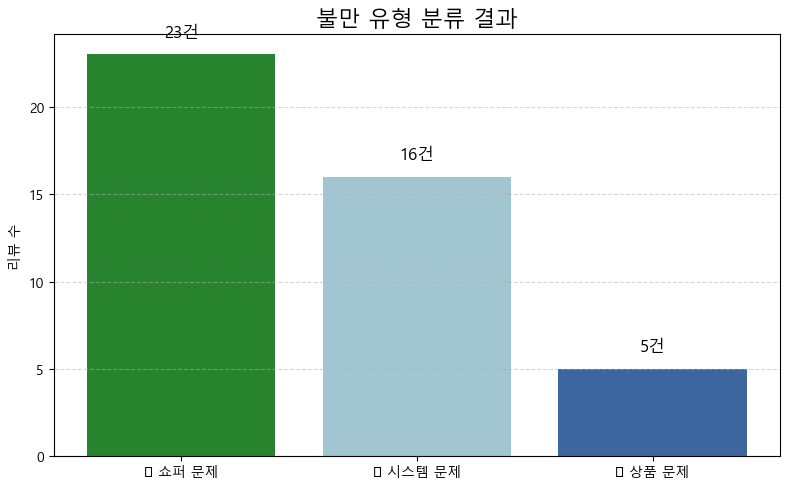

In [151]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Malgun Gothic'

issue_counts = df['issue_type'].value_counts()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 5))
bars = plt.bar(issue_counts.index, issue_counts.values, color=["#28832E", "#A1C6D2", "#3D659E"])

# Ïà´Ïûê ÎùºÎ≤®
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f"{bar.get_height()}Í±¥", ha='center', fontsize=12)

plt.title("Î∂àÎßå Ïú†Ìòï Î∂ÑÎ•ò Í≤∞Í≥º", fontproperties=font_prop, fontsize=16)
plt.ylabel("Î¶¨Î∑∞ Ïàò", fontproperties=font_prop)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [153]:
for category in df['issue_type'].unique():
    print(f"\n {category} ÎåÄÌëú Î¨∏Ïû•:")
    sample = df[df['issue_type'] == category]['sentences'].head(3)
    for s in sample:
        print(" -", s)



 üõí ÏáºÌçº Î¨∏Ï†ú ÎåÄÌëú Î¨∏Ïû•:
 - Ïä§ÌÜ± Ïï§ ÏÉµÏóê ÎèÑÏõÄÏùÑ ÏöîÏ≤≠ÌñàÏßÄÎßå, Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏Ïóê Ïó∞ÎùΩÌñàÏùÑ ÎïåÎäî ÏùëÎãµÏù¥ ÏóÜÏóàÏäµÎãàÎã§
 - ÏáºÌçºÏùò ÌíàÏßàÏù¥ ÎßéÏù¥ Îñ®Ïñ¥ÏßÑ Í≤É Í∞ôÏäµÎãàÎã§
 - ÌôòÎ∂à Í∏∞Î°ùÏù¥ ÏóÜÏäµÎãàÎã§

 üíª ÏãúÏä§ÌÖú Î¨∏Ï†ú ÎåÄÌëú Î¨∏Ïû•:
 - 10Îã¨Îü¨ Ìï†Ïù∏ Ïø†Ìè∞ÏùÑ ÏÇ¨Ïö©ÌñàÎäîÎç∞ Îëê Î≤àÏß∏ Ï£ºÎ¨∏ÏóêÎäî Í±∞Î∂ÄÎãπÌñàÍ≥† ÌôòÎ∂àÏùÑ Î∞õÏùÑ Ïàò ÏóÜÏóàÏäµÎãàÎã§
 - Ïù∏Ïä§ÌÉÄÏπ¥Ìä∏ ÏõπÏÇ¨Ïù¥Ìä∏ÏóêÎèÑ ÏïÑÎ¨¥Í≤ÉÎèÑ ÏóÜÏóàÏäµÎãàÎã§
 - 76kgÎßå Î∞õÏïòÍ≥†, Î∂àÎßåÏóê ÎåÄÌïú ÏùëÎãµÏù¥ ÏóÜÏóàÏäµÎãàÎã§

 üì¶ ÏÉÅÌíà Î¨∏Ï†ú ÎåÄÌëú Î¨∏Ïû•:
 - ÎØ∏Ïπú ÎìØÌïú Î¨∏Ï†úÎ•º ÏßëÏúºÎ°ú Í∞ÄÏ†∏Ïò§Îäî Í≤ÉÏùÄ ÏÉÅÎãπÌïú Î¨∏Ï†úÎ•º ÏïºÍ∏∞ÌñàÏúºÎ©∞ ÏûòÎ™ªÎêú Î¨ºÍ±¥ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÏóàÏäµÎãàÎã§
 - Í∑∏Îü∞Îç∞ Ïù¥Î≤àÏóêÎäî ÎÇ®ÏûêÍ∞Ä Ï£ºÎ¨∏Ìïú ÎßéÏùÄ Î¨ºÍ±¥Îì§ Ï§ë ÏùºÎ∂ÄÍ∞Ä ÏóÜÎã§Í≥† ÌëúÏãúÌñàÍ≥†, ÏµúÏïÖÏùò ÎåÄÏ≤¥ÌíàÏùÑ Í≥®ÎûêÏñ¥Ïöî
 - ÏõêÎûò Ï£ºÎ¨∏Ìïú Í≤É ÎåÄÏã†Ïóê ÏπòÌÇ® Ìå©ÏùÑ Î∞õÏïòÎäîÎç∞, Í∞ÄÍ≤©Ïù¥ Îã§Î•¥Í≥† Îã§Î•∏ Í≤ÉÎì§ÏùÑ Ï£ºÎ¨∏Ìï† Ïàò ÏóÜÎã§Í≥† ÌëúÏãúÌñàÏñ¥Ïöî


Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûëÏïÑÏÑú Í∑∏Îü∞ÏßÄ ÎåÄÌëúÎ¨∏Ïû•Ïù¥ ÎπÑÏä∑ÌïòÍ≤å ÎÇòÏò§ÎÑ§

In [156]:
from textblob import TextBlob


In [157]:
df['sentiment_score'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['label'] = df['sentiment_score'].apply(lambda x: 1 if x > 0 else 0)


In [158]:
df['Î∞∞ÏÜ°_Î¨∏Ï†ú'] = df['review'].apply(lambda x: int(any(kw in x for kw in ['ÎäêÎ¶¨Îã§', 'Îä¶Îã§', 'Î∞∞ÏÜ° ÏïàÎê®'])))
df['ÌíàÏßà_Î¨∏Ï†ú'] = df['review'].apply(lambda x: int(any(kw in x for kw in ['ÏÉÅÌïòÎã§', 'ÏãúÎì§Îã§', 'Ï∞åÍ∑∏Îü¨ÏßÄÎã§'])))


 ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤® Î≥ÄÏàòÌôî

In [161]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏Ïóê ÎåÄÏùëÌïòÎäî ÎùºÎ≤® Ïù¥Î¶Ñ (ÏöîÏïΩ Ï£ºÏ†ú)
cluster_labels = {
    0: "Ï£ºÎ¨∏ Ïò§Î•ò Î∞è ÏûòÎ™ªÎêú ÎåÄÏ≤¥Ìíà",
    1: "ÌîΩÏóÖ/Í∞ÄÍ≤å Î∞©Î¨∏ Ïù¥Ïäà",
    2: "Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå",
    3: "ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ",
    4: "ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà"
}

# ÏöîÏïΩÎêú ÏÇ¨Ïö©Ïûê ÏöîÍµ¨ÏÇ¨Ìï≠ (ÏöîÍµ¨ Ìè¨Ïù∏Ìä∏)
cluster_demands = {
    0: "Ï†ïÌôïÌïú ÏÉÅÌíà Î∞∞ÏÜ°Í≥º Ï†ÅÏ†àÌïú ÎåÄÏ≤¥Ìíà ÏÑ†ÌÉùÏù¥ ÌïÑÏöîÌï®",
    1: "Îß§Ïû• Î∞©Î¨∏ ÏóÜÏù¥ ÏáºÌïëÏù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù ÏãúÏä§ÌÖú Í∞úÏÑ† ÌïÑÏöî",
    2: "Ïø†Ìè∞/ÌôòÎ∂à Ïù¥ÏäàÏóê ÎåÄÌï¥ Îπ†Î•∏ Í≥†Í∞ù ÏùëÎåÄ Ï≤¥Í≥Ñ ÌïÑÏöî",
    3: "ÏáºÌçº ÍµêÏú° Í∞ïÌôî Î∞è ÌôòÎ∂à ÌîÑÎ°úÏÑ∏Ïä§ Ìà¨Î™ÖÌôî ÌïÑÏöî",
    4: "Í≥†Í∞ù ÏöîÏ≤≠Ïóê ÎåÄÌïú Ïã†ÏÜçÌïú ÏùëÎãµ Î∞è ÏÉÅÌíà ÎåÄÏ≤¥ Í∞úÏÑ† ÌïÑÏöî"
}


In [162]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï£ºÏ†ú Îß§Ìïë
df_filtered['cluster_label'] = df_filtered['cluster'].map(cluster_labels)

# ÏÇ¨Ïö©Ïûê ÏöîÍµ¨ÏÇ¨Ìï≠ Îß§Ìïë
df_filtered['user_demand'] = df_filtered['cluster'].map(cluster_demands)


In [159]:
df['review_length'] = df['review'].str.len()
df['num_sentences'] = df['sentences'].apply(len)
df['num_keywords'] = df['filtered_tokens'].apply(len)


In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
X_tfidf = tfidf.fit_transform(df['review'])


In [164]:
# Ïù∏Îç±Ïä§ Ï¥àÍ∏∞Ìôî (Í∏∞Ï°¥ Ïù∏Îç±Ïä§ Ï†úÍ±∞)
df_filtered = df_filtered.reset_index(drop=True)
df_filtered[['cluster', 'cluster_label', 'user_demand']].head()


cluster     cluster_label                     user_demand
0        4  ÏöîÏ≤≠ ÏùëÎãµ ÏóÜÏùå Î∞è ÎåÄÏ≤¥ Ïù¥Ïäà  Í≥†Í∞ù ÏöîÏ≤≠Ïóê ÎåÄÌïú Ïã†ÏÜçÌïú ÏùëÎãµ Î∞è ÏÉÅÌíà ÎåÄÏ≤¥ Í∞úÏÑ† ÌïÑÏöî
1        3     ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ       ÏáºÌçº ÍµêÏú° Í∞ïÌôî Î∞è ÌôòÎ∂à ÌîÑÎ°úÏÑ∏Ïä§ Ìà¨Î™ÖÌôî ÌïÑÏöî
2        2   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå     Ïø†Ìè∞/ÌôòÎ∂à Ïù¥ÏäàÏóê ÎåÄÌï¥ Îπ†Î•∏ Í≥†Í∞ù ÏùëÎåÄ Ï≤¥Í≥Ñ ÌïÑÏöî
3        2   Ïø†Ìè∞/ÏùëÎãµ ÏóÜÎäî ÏÑúÎπÑÏä§ Î∂àÎßå     Ïø†Ìè∞/ÌôòÎ∂à Ïù¥ÏäàÏóê ÎåÄÌï¥ Îπ†Î•∏ Í≥†Í∞ù ÏùëÎåÄ Ï≤¥Í≥Ñ ÌïÑÏöî
4        3     ÏáºÌçº Î¨∏Ï†ú Î∞è ÌôòÎ∂à ÎàÑÎùΩ       ÏáºÌçº ÍµêÏú° Í∞ïÌôî Î∞è ÌôòÎ∂à ÌîÑÎ°úÏÑ∏Ïä§ Ìà¨Î™ÖÌôî ÌïÑÏöî

| Î≥ÄÏàòÎ™Ö             | ÏùòÎØ∏                                                       |
| --------------- | -------------------------------------------------------- |
| `cluster`       | KMeansÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÌïú **Ïà´ÏûêÌòï ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≤àÌò∏** (`0, 1, 2, ...`)          |
| `cluster_label` | Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÇ¨ÎûåÏù¥ Î∂ôÏù∏ **ÏùòÎØ∏ ÏûàÎäî Ïù¥Î¶Ñ/Ï£ºÏ†ú ÎùºÎ≤®** (Ïòà: `"ÌôòÎ∂à Î¨∏Ï†ú"`)        |
| `user_demand`   | ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê Í∏∞Î∞òÌï¥ Ï∂îÎ°†Ìïú **ÏÇ¨Ïö©ÏûêÏùò ÏöîÍµ¨ÏÇ¨Ìï≠ ÏöîÏïΩ Î¨∏Ïû•** (Ïòà: `"ÌôòÎ∂à ÌîÑÎ°úÏÑ∏Ïä§ Í∞úÏÑ† ÌïÑÏöî"`) |


In [168]:
df_filtered.to_csv('0621_user_damand.csv',encoding='utf-8-sig',index=False)

- ÌïÑÏöîÏóÜÎÑ§ Ïù¥Ï†ÑÏóê ÌñàÎçòÍ±∞Îûë Í∞ôÏùÄÍ±∞ÏûÑ 